# Datasets

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
from wordcloud import WordCloud
import jieba
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import os

In [2]:
data_paths = [
    './Datasets/Emotional_Datiing_data_check.json',
    './Datasets/Gamble_data_check.json',
    './Datasets/investment_data_check.json',
    './Datasets/Work_data_check.json'
]

categories = ['emotional_datiing', 'gamble', 'investment', 'work']

In [3]:
# ËÆÄÂèñ JSON ‰∏¶Âêà‰ΩµË≥áÊñô
datasets1 = []
for path, category in zip(data_paths, categories):
    with open(path, 'r', encoding='utf-8') as file:
        content = json.load(file)
        if 'thread' in content: 
            # ÁÇ∫ÊØè‰∏ÄÁ≠ÜË≥áÊñôÂä†ÂÖ• category Ê¨Ñ‰Ωç
            for item in content['thread']:
                item['category'] = category
            datasets1.extend(content['thread'])

df1 = pd.json_normalize(datasets1)
df1

post_id  \
0      3528827594374693847_53246470008   
1      3512827533387664484_58259843840   
2      3528793108974687479_41467470665   
3      3528521399235069052_64680969021   
4      3528610236690527687_56132272433   
...                                ...   
20779  3528743702698590954_26493555894   
20780   3528610149885264679_1984080866   
20781   3528665065866370957_3630939767   
20782   3528708657716196434_8136480251   
20783     3528724585481080089_15597007   

                                                    text  \
0                                                   ÊµÅÈáèÂØÜÁ¢º   
1                        19Ê≠≤Áü•ÈÅìÁî∑ÂèãÊâãÊ©üÂØÜÁ¢ºÂæàÊúâÂÆâÂÖ®ÊÑü29Ê≠≤Êà∂È†≠Êúâ200Ëê¨ÂæàÊúâÂÆâÂÖ®ÊÑü   
2                                  Â•ΩÂÉèÊòØÊ¨∏ÊòåËë£ÁöÑËªäÊòØÊµÅÈáèÂØÜÁ¢ºthumbsup   
3                              ‰æãÂ¶Ç‰ªÄÈ∫ºËÆìÊàëÂÅ¥ËÄ≥ÂÇæËÅΩredheartÊµÅÈáèÂØÜÁ¢ºÂú®Âì™Ë£°   
4      Êü•Â¥óÊâãÊ©üÊãø‰æÜÊ¥õÁáÅÊº´‰∏çÁ∂ìÂøÉÂú∞Â∞áÊâãÊ©üÊîæÂú®‰ªñÊâãÂøÉ‰∏äÂØÜÁ¢ºÊàëÁîüÊó•ÁÆó‰∫ÜÊàëÊå∫Áõ∏‰ø°‰Ω†ÁöÑË™™ÁΩ∑‰æøÂ∞áÊâãÊ©üÈÇÑÁµ¶‰∫Ü‰ªñ‰Ω†...   
...                                                  ...   
20779                                            Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß   
20780  Âúã‰∏ÄÂ§ßÂÆâÈ´òÂ∑•orÈï∑Â∫öË≠∑Â∞àÂõûÈ†≠ÁúãË¶∫ÂæóÂúã‰∏ÄÂøóÈ°òË®≠ÈÄôÂÖ©ÂÄãË∂Ö‰∏çÈÅ©ÂêàËá™Â∑±Âúã‰∫åÂ§ßÂÆâÈ´òÂ∑•Â∏´Â§ßÈôÑ‰∏≠Ë®±È°òËÆÄÁöÑÈ´ò...   
20781                                       ‰∏≠Á≤âÈÉΩ‰∏çÁî®Ë≥∫Èå¢‰∏çÁî®‰∏äÁè≠Âóé   
20782                              Âéü‰æÜÂèØÊòØÊàë‰πüÁñëÊÉëÂ´åÁäØÂÅ∑Âà∞ÊâãÊ©üÊÄéÈ∫ºÊ≤íÁôªÂÖ•ÂìàÂìà   
20783               Âõ†ÁÇ∫Â≠∏Ë≥∫Èå¢‰∏çÊòØÂ≠∏Ê†°ÊïôËÇ≤ÁöÑÁõÆÁöÑÊé¢Á¥¢Ëá™Â∑±ÊâæÂà∞ËààË∂£ÂÅöÂÄãÂ∞çÁ§æÊúÉÊúâË≤¢ÁçªÁöÑ‰∫∫ÊØîËºÉÈáçË¶Å   

                     username  \
0                  qingimissu   
1                       a7prn   
2                   ouozz0317   
3      local_sisters_need_you   
4                _.0718.venti   
...                       ...   
20779              xinfang724   
20780                yyu_0310   
20781             tzulingweng   
20782            without_0830   
20783            gtandrewwwww   

                                                     url           category  
0      https://www.threads.net/@qingimissu/post/DD46g...  emotional_datiing  
1        https://www.threads.net/@a7prn/post/DDAEgekyIxk  emotional_datiing  
2      https://www.threads.net/@ouozz0317/post/DD4yqL...  emotional_datiing  
3      https://www.threads.net/@local_sisters_need_yo...  emotional_datiing  
4      https://www.threads.net/@_.0718.venti/post/DD4...  emotional_datiing  
...                                                  ...                ...  
20779  https://www.threads.net/@xinfang724/post/DD4nb...               work  
20780  https://www.threads.net/@yyu_0310/post/DD4JDxm...               work  
20781  https://www.threads.net/@tzulingweng/post/DD4V...               work  
20782  https://www.threads.net/@without_0830/post/DD4...               work  
20783  https://www.threads.net/@gtandrewwwww/post/DD4...               work  

[20784 rows x 5 columns]

In [4]:
with open(f'./Llama/dataset/combined_data_unique.json', 'r', encoding='utf-8') as file:
    content = json.load(file)
df2 = pd.DataFrame(content)
df2

text           category
0                                                   ÊµÅÈáèÂØÜÁ¢º  emotional_datiing
1                        19Ê≠≤Áü•ÈÅìÁî∑ÂèãÊâãÊ©üÂØÜÁ¢ºÂæàÊúâÂÆâÂÖ®ÊÑü29Ê≠≤Êà∂È†≠Êúâ200Ëê¨ÂæàÊúâÂÆâÂÖ®ÊÑü  emotional_datiing
2                                  Â•ΩÂÉèÊòØÊ¨∏ÊòåËë£ÁöÑËªäÊòØÊµÅÈáèÂØÜÁ¢ºthumbsup  emotional_datiing
3                              ‰æãÂ¶Ç‰ªÄÈ∫ºËÆìÊàëÂÅ¥ËÄ≥ÂÇæËÅΩredheartÊµÅÈáèÂØÜÁ¢ºÂú®Âì™Ë£°  emotional_datiing
4      Êü•Â¥óÊâãÊ©üÊãø‰æÜÊ¥õÁáÅÊº´‰∏çÁ∂ìÂøÉÂú∞Â∞áÊâãÊ©üÊîæÂú®‰ªñÊâãÂøÉ‰∏äÂØÜÁ¢ºÊàëÁîüÊó•ÁÆó‰∫ÜÊàëÊå∫Áõ∏‰ø°‰Ω†ÁöÑË™™ÁΩ∑‰æøÂ∞áÊâãÊ©üÈÇÑÁµ¶‰∫Ü‰ªñ‰Ω†...  emotional_datiing
...                                                  ...                ...
15842                                            Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß               work
15843  Âúã‰∏ÄÂ§ßÂÆâÈ´òÂ∑•orÈï∑Â∫öË≠∑Â∞àÂõûÈ†≠ÁúãË¶∫ÂæóÂúã‰∏ÄÂøóÈ°òË®≠ÈÄôÂÖ©ÂÄãË∂Ö‰∏çÈÅ©ÂêàËá™Â∑±Âúã‰∫åÂ§ßÂÆâÈ´òÂ∑•Â∏´Â§ßÈôÑ‰∏≠Ë®±È°òËÆÄÁöÑÈ´ò...               work
15844                                       ‰∏≠Á≤âÈÉΩ‰∏çÁî®Ë≥∫Èå¢‰∏çÁî®‰∏äÁè≠Âóé               work
15845                              Âéü‰æÜÂèØÊòØÊàë‰πüÁñëÊÉëÂ´åÁäØÂÅ∑Âà∞ÊâãÊ©üÊÄéÈ∫ºÊ≤íÁôªÂÖ•ÂìàÂìà               work
15846               Âõ†ÁÇ∫Â≠∏Ë≥∫Èå¢‰∏çÊòØÂ≠∏Ê†°ÊïôËÇ≤ÁöÑÁõÆÁöÑÊé¢Á¥¢Ëá™Â∑±ÊâæÂà∞ËààË∂£ÂÅöÂÄãÂ∞çÁ§æÊúÉÊúâË≤¢ÁçªÁöÑ‰∫∫ÊØîËºÉÈáçË¶Å               work

[15847 rows x 2 columns]

In [5]:
datasets3 = []
for i in range(1, 5):  # ËÆÄÂèñ data_1.json ~ data_4.json
    with open(f'./Llama/labeled_datasets/data_{i}.json', 'r', encoding='utf-8') as file:
        data = json.load(file)
        if 'thread' in data:  # Á¢∫‰øù 'thread' Â≠òÂú®
            datasets3.extend(data['thread'])

df3 = pd.json_normalize(datasets3)
df3

text  published_on  \
0        ÊàëÂÄëÈÄôÈÇäÊúâÁº∫Âë¶womanraisinghandlightskintoneÂú®ÂÆ∂Â∑•‰ΩúËºïÈ¨ÜË≥∫È£ΩÈ£Ω    1730169637   
1    ÁèæÂú®ÁöÑÂ•≥ÁîüÊòØÊÄéÈ∫º‰∫ÜÂÖºËÅ∑Ëñ™Ê∞¥37520Ëµ∑‰∏ÄÊîØÊâãÊ©üÂ∞±ËÉΩÂ∑•‰ΩúÂ∑•‰ΩúËºïÈ¨ÜÁ∞°ÊòìÂ•Ω‰∏äÊâãÈáçÈªûÂú®ÂÆ∂Â∞±ËÉΩ‰ΩúÊ•≠Âèà‰∏ç...    1733580598   
2    Ëá™ÁáüÈõªÂïÜÈÄô‰ªΩÂ∑•‰ΩúÂ∞±ÊòØÂÇ≥Ë™™‰∏≠ÁöÑÁàΩË≥∫ÂèàËºïÈ¨Ü‰Ω†ÂèØ‰ª•ÂæÖÂú®ÂÆ∂ÊàñÂú®ÂíñÂï°Âª≥ÈÇäÂñùÂíñÂï°ÈÇäÂ∑•‰ΩúÊôÇÈñìË∂ÖÂΩàÊÄßÊÉ≥ÂéªÂì™Â∞±...    1730471504   
3    Ë´ãÂïèÊúâÊ≤íÊúâÂú®SouthKoreaÈüìÂúãÁöÑËÑÜ‰∫∫ÊÉ≥Ë¶ÅÂú®ÂÆ∂Â∑•‰ΩúË≥∫Èõ∂Áî®Èå¢ÁöÑmoneybagSouthK...    1714919780   
4    Â¶ÇÊûú‰Ω†Ë¶∫Âæó‰Ω†Â≠∏Ê≠∑‰∏çÂ•ΩÂèàÊ≤íÊúâÁâπÂà•ÁöÑ‰∏ÄÊäÄ‰πãÈï∑Âª∫Ë≠∞Êúâ‰∏âÂÄãÂ∑•‰ΩúÂ§ßÂÆ∂ÂèØ‰ª•ÂéªÊåëÊà∞ÊúÉÊúâ‰∏çÈåØÁöÑÊî∂ÂÖ•Á¨¨‰∏ÄÂÅöÊ•≠Âãô...    1733584031   
..                                                 ...           ...   
179  Â¶ÇÊò®Â§©ÊâÄË™™ÈõÜ‰∏≠ÈÅáÂà∞ÂâçÊ≥¢È´òÈªûÊ´ÉË≤∑ÈÅáÂà∞Â≠£Á∑öÂèçÂ£ìÁü≠Á∑öÊº≤Â§öËÇ°Âá∫ÁèæÊ≤âÈáçË≥£Â£ìÊòØÂèØ‰ª•È†êÊúüÁöÑBBU‰ªäÂ§©Â∞±Ë∑åÂÅú...    1733724002   
180  ‰ªäÊó•Âè∞ËÇ°ÈÉ®ÂàÜÂàÜÊûêÂè∞Á©çÈõª2330ÁõÆÂâçÊîØÊíê‰ΩçÂú®996Â£ìÂäõ1006È¥ªÊµ∑2317‰∏ãË∑åË∂®Âã¢ÊîØÊíê1963...    1732710641   
181  12Êúà9Êó•Âè∞ËÇ°Áõ§ÂâçÂàÜÊûê11ÊúàÁöÑÁæéÂúãÂ∞±Ê•≠Â∏ÇÂ†¥ÊúâÈªûÂÉèËÑ´ÈüÅÈáéÈ¶¨‰∏ç‰ΩÜË∑ëÂõûÊàêÈï∑ËªåÈÅìÈùûËæ≤Â∞±Ê•≠‰∫∫Êï∏ÁãÇÂ¢û22...    1733710865   
182  Âè∞ËÇ°ÂàÜÊûêÊò®Â§©ÂâõÂàÜ‰∫´È¶¨‰∏äÊâìÂà∞Ë∑åÂÅúÁúüÂ∏åÊúõÊàëËÉΩÈ†êÁü•Ê®ÇÈÄègrinningfacewithsweatg...    1732762331   
183  Â¶ÇÊûúÊúâ500Ëê¨Ë¶ÅÈÅ∏ÊìáÂñÆÂ£ìÂØåÈÇ¶ÈáëÊàñ0050ÈÄôË¶ÅÁúã‰Ω†ÁöÑÊäïË≥áÁõÆÊ®ôËàáÈ¢®Èö™ÊâøÂèóËÉΩÂäõ‰ª•‰∏ãÊòØÂÖ©ËÄÖÁöÑÂàÜÊûê1ÂØå...    1733641953   

                                  id                   pk         code  \
0    3489238272088311481_59587263059  3489238272088311481  DBsQ7jAhYa5   
1     3517851489467803330_8518757602  3517851489467803330  DDR60qSTqbC   
2    3491770518582338398_68230585353  3491770518582338398  DB1QslVSCNe   
3      3361313202691992871_787282649  3361313202691992871  C6lyIyBSW0n   
4    3517880283045768144_59724490747  3517880283045768144  DDSBXqZSyvQ   
..                               ...                  ...          ...   
179  3519054441850951005_53082837972  3519054441850951005  DDWMV6_yVVd   
180  3510553763071912955_11919131598  3510553763071912955  DC3_gw8z-v7   
181  3518944249704096365_61028370666  3518944249704096365  DDVzSakBCJt   
182  3510987368600311582_67156474901  3510987368600311582  DC5iGjkThce   
183    3518366176113974535_443361509  3518366176113974535  DDTv2VlBd0H   

             username                                           user_pic  \
0          _hanyu.tw_  https://scontent-iad3-2.cdninstagram.com/v/t51...   
1     xiashitong_1990  https://scontent-iad3-2.cdninstagram.com/v/t51...   
2          98_findyou  https://scontent-iad3-2.cdninstagram.com/v/t51...   
3                01_l  https://scontent-iad3-1.cdninstagram.com/v/t51...   
4    benson.hearttalk  https://instagram.fagc3-1.fna.fbcdn.net/v/t51....   
..                ...                                                ...   
179    millerstock543  https://scontent-sjc3-1.cdninstagram.com/v/t51...   
180      solutumworks  https://scontent-sjc3-1.cdninstagram.com/v/t51...   
181        88loverich  https://scontent-sjc3-1.cdninstagram.com/v/t51...   
182        sk12084a23  https://scontent-sjc3-1.cdninstagram.com/v/t51...   
183   russiahouse2001  https://scontent-sjc3-1.cdninstagram.com/v/t51...   

     user_verified      user_pk      user_id has_audio  reply_count  \
0            False  59587263059  59587263059      None            0   
1            False   8518757602   8518757602      None            8   
2            False  68230585353  68230585353      None            7   
3            False    787282649    787282649      None           82   
4            False  59724490747  59724490747      None           22   
..             ...          ...          ...       ...          ...   
179          False  53082837972  53082837972      None            0   
180          False  11919131598  11919131598      None            8   
181          False  61028370666  61028370666      None      

In [6]:
with open('./Llama/dataset/training.json', 'r', encoding='utf-8') as file:
    content = json.load(file)
df4 = pd.DataFrame(content)
df4

text  label  \
0                                                   ÊµÅÈáèÂØÜÁ¢º      0   
1                        19Ê≠≤Áü•ÈÅìÁî∑ÂèãÊâãÊ©üÂØÜÁ¢ºÂæàÊúâÂÆâÂÖ®ÊÑü29Ê≠≤Êà∂È†≠Êúâ200Ëê¨ÂæàÊúâÂÆâÂÖ®ÊÑü      1   
2                              ‰æãÂ¶Ç‰ªÄÈ∫ºËÆìÊàëÂÅ¥ËÄ≥ÂÇæËÅΩredheartÊµÅÈáèÂØÜÁ¢ºÂú®Âì™Ë£°      1   
3      Êü•Â¥óÊâãÊ©üÊãø‰æÜÊ¥õÁáÅÊº´‰∏çÁ∂ìÂøÉÂú∞Â∞áÊâãÊ©üÊîæÂú®‰ªñÊâãÂøÉ‰∏äÂØÜÁ¢ºÊàëÁîüÊó•ÁÆó‰∫ÜÊàëÊå∫Áõ∏‰ø°‰Ω†ÁöÑË™™ÁΩ∑‰æøÂ∞áÊâãÊ©üÈÇÑÁµ¶‰∫Ü‰ªñ‰Ω†...      0   
4                                         ËøΩÊòüÂ•≥ÁöÑÊë©ÊñØÂØÜÁ¢ºbelike      0   
...                                                  ...    ...   
13505              Ë∑üÊàë‰∏ÄÊ®£rollingonthefloorlaughingËÅΩÂà∞Âè∞ÁÅ£ÊâçÊãøÊâãÊ©ü      0   
13506  Âúã‰∏ÄÂ§ßÂÆâÈ´òÂ∑•orÈï∑Â∫öË≠∑Â∞àÂõûÈ†≠ÁúãË¶∫ÂæóÂúã‰∏ÄÂøóÈ°òË®≠ÈÄôÂÖ©ÂÄãË∂Ö‰∏çÈÅ©ÂêàËá™Â∑±Âúã‰∫åÂ§ßÂÆâÈ´òÂ∑•Â∏´Â§ßÈôÑ‰∏≠Ë®±È°òËÆÄÁöÑÈ´ò...      0   
13507                                       ‰∏≠Á≤âÈÉΩ‰∏çÁî®Ë≥∫Èå¢‰∏çÁî®‰∏äÁè≠Âóé      1   
13508                              Âéü‰æÜÂèØÊòØÊàë‰πüÁñëÊÉëÂ´åÁäØÂÅ∑Âà∞ÊâãÊ©üÊÄéÈ∫ºÊ≤íÁôªÂÖ•ÂìàÂìà      0   
13509               Âõ†ÁÇ∫Â≠∏Ë≥∫Èå¢‰∏çÊòØÂ≠∏Ê†°ÊïôËÇ≤ÁöÑÁõÆÁöÑÊé¢Á¥¢Ëá™Â∑±ÊâæÂà∞ËààË∂£ÂÅöÂÄãÂ∞çÁ§æÊúÉÊúâË≤¢ÁçªÁöÑ‰∫∫ÊØîËºÉÈáçË¶Å      0   

                                             explination  
0      Ë≤ºÊñáÂÉÖÊèê‰æõ„ÄåÊµÅÈáèÂØÜÁ¢º„ÄçÈÄôÂÄãÊ®°Á≥äÁöÑË©ûË™ûÔºå‰∏¶ÁÑ°‰ªª‰ΩïÂÖ∑È´îÁöÑÂÖßÂÆπÊàñË≥áË®äÔºåÁÑ°Ê≥ïÂà§Êñ∑ÂÖ∂ÊòØÂê¶ÁÇ∫Ë©êÈ®ôÊàñË™òÂ∞éÊÄß...  
1                                                         
2      Ë≤ºÊñáÂ∞ãÊ±ÇÈùûÂÖ¨ÈñãÁöÑË®äÊÅØÊàñ„ÄåÊµÅÈáèÂØÜÁ¢º„ÄçÔºåÈÄôÂèØËÉΩÊòØË©êÈ®ôËÄÖÁî®‰æÜË™òÈ®ôÁî®Êà∂Âä†ÂÖ•‰∏çÊ≥ïÁæ§ÁµÑÊàñÊèê‰æõÂÄã‰∫∫Ë≥áË®äÁöÑÊâã...  
3      ÈÄôÂâáË≤ºÊñáÊòØÊèèËø∞‰∏ÄÂÄãÈóúÊñºÊâãÊ©üËàáÂØÜÁ¢ºÔºå‰ª•ÂèäÊìîÂøÉÂ∞çÊñπÂøòË®òÁîüÊó•ÁöÑÂ∞çË©±Â†¥ÊôØÔºåÂ±¨ÊñºÂÄã‰∫∫Á∂ìÈ©óÊàñË∂£‰∫ãÂàÜ‰∫´ÔºåÊ≤í...  
4      Ë≤ºÊñáÂÖßÂÆπÁÇ∫ÂºïÁî®Ëé´ÊñØÂØÜÁ¢ºÁöÑ‰æãÂ≠êÔºå‰∏¶Êê≠ÈÖçËøΩÊòüÁõ∏ÈóúÁöÑÂπΩÈªòË©ïË´ñÔºåÂ±¨ÊñºÊúâË∂£ÁöÑÁîüÊ¥ªÂàÜ‰∫´ÂÖßÂÆπÔºå‰∏¶ÁÑ°‰ªª‰ΩïË©êÈ®ô...  
...                                                  ...  
13505     Ë≤ºÊñáÂàÜ‰∫´ÂÄã‰∫∫Âú®Âè∞ÁÅ£ËÅΩÂà∞ËÉåÊôØÈü≥Ê®ÇÁöÑÊúâË∂£Á∂ìÈ©óÔºåÂ±¨ÊñºÊó•Â∏∏ÁîüÊ¥ªÂàÜ‰∫´ÂÖßÂÆπÔºå‰∏¶ÁÑ°‰ªª‰ΩïË©êÈ®ôÁâπÂæµÊàñË™òÂ∞éÊÄß„ÄÇ„Äè  
13506                                                     
13507  Ë≤ºÊñáÂÖßÂÆπÁñëÂïèÊòØÂê¶‰∏çÁî®Â∑•‰ΩúÂ∞±ËÉΩÁîüÂ≠òÔºåÂèØËÉΩÂèçÊò†Âá∫Â∞çÁ§æÊúÉÁ∂ìÊøüÁãÄÊ≥ÅÊàñËÅ∑Ê•≠ËßÄÂøµÁöÑË™§Ëß£ÔºåÈõñÁÑ∂Ê≤íÊúâÊòéÁ¢∫ÁöÑË©ê...  
13508    Ë≤ºÊñáÂàÜ‰∫´ÂÄã‰∫∫Â∞çÊñºÊñ∞ËÅû‰∫ã‰ª∂ÁöÑÁúãÊ≥ïÊàñÁñëÂïèÔºåÊú™Ë¶ã‰ªª‰ΩïË™òÂ∞éÊÄßÊàñË©êÈ®ôÁâπÂæµÔºåÂ±¨ÊñºÊôÆÈÄöÁöÑÁ§æ‰∫§Â™íÈ´î‰∫íÂãïÂÖßÂÆπ„ÄÇ„Äè  
13509                                                     

[13510 rows x 3 columns]

In [7]:
with open('./Llama/dataset/test/label_test.json', 'r', encoding='utf-8') as file:
    content = json.load(file)

datasets5 = []

for category, items in content.items():
    for item in items:
        datasets5.append({
            'text': item['text'],
            'category': item['category'],
            'label': item['label']
        })

df5 = pd.DataFrame(datasets5)
df5

text           category  \
0                                 Â•ΩÂÉèÊòØÊ¨∏ÊòåËë£ÁöÑËªäÊòØÊµÅÈáèÂØÜÁ¢ºthumbsup  emotional_datiing   
1                                         ÁéªÁíÉÁè†ÊàíÊåáÂâµÊ•≠Êó•Ë®òÊµÅÈáèÂØÜÁ¢º  emotional_datiing   
2                                            ÊÇ®Â•ΩÁ§æÁæ§ÂØÜÁ¢º1997  emotional_datiing   
3     ‰∏çË≤†Ë≤¨‰ªªÁøªË≠ØwomanraisinghandÊúÄËøëËàá2pmÁöÑÊàêÂì°ÂÄëÊúâÁ¢∞Èù¢Âóéhatchingch...  emotional_datiing   
4                     ‰ø°‰∏Ä0723Ë¶ÜÊ©üCallÂè∞Ê©ü‰∏ªÂØÜÁ¢º‰ø°‰∏ÄCallÂè∞ÂçÅ‰∫åÂ∞ëCall‰Ω†Ë©±  emotional_datiing   
...                                                 ...                ...   
2937                                       Ë¶Å‰∏çË¶ÅËÄÉÊÖÆÂè´ÈòøÊ¢ÖÂÖàÊèõÊâãÊ©ü               work   
2938  ÊÑüË¨ùÁ®±ËÆö‰∏çÈÅéÊàëË¶∫ÂæóÁµêÂ©öÊòØÁÇ∫‰∫ÜÂπ∏Á¶èËàâËæ¶Â©öÁ¶Æ‰πüÊòØÂ∏åÊúõÂ§ßÂÆ∂Ë¶ãË≠âÂ•πÁöÑÂπ∏Á¶èÂåÖÁ¥ÖÂåÖ‰πü‰∏çÊòØÊÉ≥Ë¶ÅË≥∫Èå¢ÂõûÊú¨ÊòØÂÉè...               work   
2939  Áµ¶ÊÉ≥Êé•Ëß∏Âä†ÂØÜË≤®Âπ£ÊúãÂèãÁöÑÂª∫Ë≠∞ÊàñË®±‰Ω†ÊòØÂú®ÊØîÁâπÂπ£Á™ÅÁ†¥10Ëê¨ÊâçÈñãÂßãÁôºÁèæ‰∏¶Êé•Ëß∏Âà∞ÈÄôÂ°äÂ∏ÇÂ†¥Âú®ÈÄôÈÇä‰πüÂÖàÊÅ≠Âñú...               work   
2940                                           Ëá™Â∑±ÊâãÊ©üËºÉÂ•ΩÁúãÈΩÅ               work   
2941                                            Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß               work   

      label  
0         1  
1         1  
2         1  
3         0  
4         1  
...     ...  
2937      0  
2938      0  
2939      0  
2940      0  
2941      0  

[2942 rows x 3 columns]

In [8]:
with open('./Llama/traning_dataset_text_V01.json', 'r', encoding='utf-8') as file:
    content = json.load(file)
df6 = pd.DataFrame(content['train'])
df6

text label
0        Áπº‰πãÂâç‰∏ñÈå¶Ë≥Ω‰∏âÈÄ£Êí≤ÔºåÂèàÊúâÊñ∞‰Ωú\nÂú∞ÊùøÂãï‰ΩúÊúÄÂº∑ÁöÑÁæΩÁêÉÈÅ∏Êâã - ÊùéÊ¥ãüî•\nÊù≠Â∑ûÂπ¥ÁµÇË≥ΩÂ∞èÁµÑË≥Ωday2  None
1      ÈÅÆÊîæÂ≠óÈ´îÂπ¥Êú´Â§ßÂÑ™ÊÉ†‰πãÈ§ò\nÈÇÑÂÅö‰∫ÜÂøÉÁêÜÊ∏¨È©óÁµ¶Â§ßÂÆ∂Áé©ÔºÅÔºÅÔºÅ\n\nÊàëÊ∏¨Âá∫ÊÑõÂì≠ÂåÖ‚ãØ‚ãØ(Àô‚óÅÀô)\n...  None
2      Ë™™‰∏çÂÆö‰∫∫ÂÆ∂‰πüÂú®Âøç‰Ω†Âë¢Ôºü\n\nÊàëÁúãÈÅéÂäâÂòâÁé≤Âú®ÊüêÊ¨°Ë®™Ë´áË£°ËÅäÂ©öÂßª‰πãÈÅìÔºåÂ∞çÊñπÂïè‰ªñÂ¶Ç‰ΩïÁ∂≠ÊåÅÔºü‰ªñË™™„Äå‰Ω†...  None
3      Á≠â‰∏ã‰∫îÈªûÂçäÊúâÂÄãÈ§êÊúÉÔºå\nÊôÇÈñìÈÇÑÊ≤íÂà∞Ôºå\nÊúÉÈ§®ÈôÑËøëÊâæ‰∫ÜÈñìÂíñÂï°Â∫óÔºå\nÁÑ∂Âæå....ÊàëÂêÉÈ£Ω‰∫ÜÔºÅü•≤\...  None
4                                                ÊôöÈ§êÂêÉ‰ªÄÈ∫º==  None
...                                                  ...   ...
27728                                        ÈÇ£ÂÄãÔºå‰∏çÊòØÈÄôÁ®ÆÊéíÁêÉÂ∞ëÂπ¥  None
27729  #Ëø∑Âõ†Êí©Ê≥ï 1279\n\nÁå¥Ê¥óËõãËõã\n\n------------------------...  None
27730                 ÊàëËÇØÂÆöË¶ÅÊâæÂèØ‰ª•Èô™ÊàëÂêÉÈÇ£È∫ºÂ§öÊù±Ë•øÁöÑ‰∫∫\nÊúâ‰∫∫Ë¶Å+1Âóé\n\nËê¨‰∫ãÂïèËÑÜÂèã  None
27731  „ÄåÁÇ∫‰ªÄÈ∫ºË¶ÅÈÄôÈ∫ºÂä™ÂäõÔºü„Äç\n„ÄåÂõ†ÁÇ∫Êàë‰∏çÊÉ≥Ë¶ÅÂõ†ÁÇ∫ÊàëÁöÑ‰∏çÂä™Âäõ„ÄÅ‰∏çÈ°òÊÑè„ÄÅ‰∏çÂãáÊï¢ÔºåËÄåÈåØÈÅéÈÇ£‰∫õÔºåÊú¨‰æÜÂèØ‰ª•...  None
27732                               ÈÄ±Êú´ÂÜ¨ÁõüÂ§ßËàûÂª≥Ë¶ãüòã\n\n2024AWB  None

[27733 rows x 2 columns]

In [9]:
df1_texts = set(df1["text"])
df2_texts = set(df2["text"])
df3_texts = set(df3["text"])
df4_texts = set(df4["text"])
df5_texts = set(df5["text"])
df6_texts = set(df6["text"])

print(f"df1 Êúâ {len(df1_texts)} / {len(df1)} ÂÄã unique text (DatasetsË≥áÊñôÂ§æ)")
print(f"df2 Êúâ {len(df2_texts)} / {len(df2)} ÂÄã unique text (combined_data_unique.json)")
print(f"df3 Êúâ {len(df3_texts)} / {len(df3)} ÂÄã unique text (labeled_datasetsË≥áÊñôÂ§æ)")
print(f"df4 Êúâ {len(df4_texts)} / {len(df4)} ÂÄã unique text (training.json)")
print(f"df5 Êúâ {len(df5_texts)} / {len(df5)} ÂÄã unique text (label_test.json)")
print(f"df6 Êúâ {len(df6_texts)} / {len(df6)} ÂÄã unique text (traning_dataset_text_V01.json)")

df1 Êúâ 15847 / 20784 ÂÄã unique text (DatasetsË≥áÊñôÂ§æ)
df2 Êúâ 15847 / 15847 ÂÄã unique text (combined_data_unique.json)
df3 Êúâ 181 / 184 ÂÄã unique text (labeled_datasetsË≥áÊñôÂ§æ)
df4 Êúâ 13510 / 13510 ÂÄã unique text (training.json)
df5 Êúâ 2335 / 2942 ÂÄã unique text (label_test.json)
df6 Êúâ 462 / 27733 ÂÄã unique text (traning_dataset_text_V01.json)


In [10]:
if df2_texts.issubset(df1_texts):
    print("df1 ÂÆåÂÖ®ÂåÖÂê´ df2 ÁöÑÊâÄÊúâ text")
else:
    print(f"df1 Áº∫Â∞ë {len(df2_texts.difference(df1_texts))} ÂÄã df2 ÁöÑ textÔºå‰∏îÊúâ {len(df2_texts.intersection(df1_texts))} ÂÄãÁõ∏ÂêåÁöÑ text")

if df3_texts.issubset(df1_texts):
    print("df1 ÂÆåÂÖ®ÂåÖÂê´ df3 ÁöÑÊâÄÊúâ text")
else:
    print(f"df1 Áº∫Â∞ë {len(df3_texts.difference(df1_texts))} ÂÄã df3 ÁöÑ textÔºå‰∏îÊúâ {len(df3_texts.intersection(df1_texts))} ÂÄãÁõ∏ÂêåÁöÑ text")

if df4_texts.issubset(df1_texts):
    print("df1 ÂÆåÂÖ®ÂåÖÂê´ df4 ÁöÑÊâÄÊúâ text")
else:
    print(f"df1 Áº∫Â∞ë {len(df4_texts.difference(df1_texts))} ÂÄã df4 ÁöÑ textÔºå‰∏îÊúâ {len(df4_texts.intersection(df1_texts))} ÂÄãÁõ∏ÂêåÁöÑ text")

if df5_texts.issubset(df1_texts):
    print("df1 ÂÆåÂÖ®ÂåÖÂê´ df5 ÁöÑÊâÄÊúâ text")
else:
    print(f"df1 Áº∫Â∞ë {len(df5_texts.difference(df1_texts))} ÂÄã df5 ÁöÑ textÔºå‰∏îÊúâ {len(df5_texts.intersection(df1_texts))} ÂÄãÁõ∏ÂêåÁöÑ text")

if df5_texts.issubset(df4_texts):
    print("df5 ÂÆåÂÖ®ÂåÖÂê´ df4 ÁöÑÊâÄÊúâ text")
else:
    print(f"df5 Áº∫Â∞ë {len(df4_texts.difference(df5_texts))} ÂÄã df4 ÁöÑ textÔºå‰∏îÊúâ {len(df4_texts.intersection(df5_texts))} ÂÄãÁõ∏ÂêåÁöÑ text")

df1 ÂÆåÂÖ®ÂåÖÂê´ df2 ÁöÑÊâÄÊúâ text
df1 Áº∫Â∞ë 159 ÂÄã df3 ÁöÑ textÔºå‰∏îÊúâ 22 ÂÄãÁõ∏ÂêåÁöÑ text
df1 ÂÆåÂÖ®ÂåÖÂê´ df4 ÁöÑÊâÄÊúâ text
df1 ÂÆåÂÖ®ÂåÖÂê´ df5 ÁöÑÊâÄÊúâ text
df5 Áº∫Â∞ë 13510 ÂÄã df4 ÁöÑ textÔºå‰∏îÊúâ 0 ÂÄãÁõ∏ÂêåÁöÑ text


In [11]:
print(f"datasets         ÂÖ±Êúâ {len(df1_texts)} unique text")
print(f"training + test  ÂÖ±Êúâ {len(df5_texts) + len(df4_texts)} unique text")
print(f"                 Áº∫Â∞ë {len(df1_texts) - (len(df5_texts) + len(df4_texts))} unique text")

datasets         ÂÖ±Êúâ 15847 unique text
training + test  ÂÖ±Êúâ 15845 unique text
                 Áº∫Â∞ë 2 unique text


In [12]:
print(df1.isnull().sum())

post_id     0
text        0
username    0
url         0
category    0
dtype: int64


In [13]:
print(df2.isnull().sum())

text        0
category    0
dtype: int64


In [14]:
print(df3.isnull().sum())

text               0
published_on       0
id                 0
pk                 0
code               0
username           0
user_pic           0
user_verified      0
user_pk            0
user_id            0
has_audio        181
reply_count        0
like_count         0
images           114
image_count      114
videos           181
url                0
label              0
dtype: int64


In [15]:
print(df4.isnull().sum())

text           0
label          0
explination    0
dtype: int64


In [16]:
print(df5.isnull().sum())

text        0
category    0
label       0
dtype: int64


In [17]:
df5 = df5.drop_duplicates(subset=["text"]).reset_index(drop=True)

In [18]:
# combined_data_unique.jsonÁÇ∫Â∫ï + training.json + label_test.json

# combined_data_unique.json (text, category)
# training.json             (text,           label, explination)
# label_test.json           (text, category, label)

data = df2.merge(df4[['text', 'label', 'explination']], on="text", how="left", suffixes=('', '_df4'))
data = data.merge(df5[['text', 'label']], on="text", how="left", suffixes=('', '_df5'))
data['label'] = data['label'].fillna(data['label_df5'])
data = data.drop(columns=['label_df5'])
data

text           category  \
0                                                   ÊµÅÈáèÂØÜÁ¢º  emotional_datiing   
1                        19Ê≠≤Áü•ÈÅìÁî∑ÂèãÊâãÊ©üÂØÜÁ¢ºÂæàÊúâÂÆâÂÖ®ÊÑü29Ê≠≤Êà∂È†≠Êúâ200Ëê¨ÂæàÊúâÂÆâÂÖ®ÊÑü  emotional_datiing   
2                                  Â•ΩÂÉèÊòØÊ¨∏ÊòåËë£ÁöÑËªäÊòØÊµÅÈáèÂØÜÁ¢ºthumbsup  emotional_datiing   
3                              ‰æãÂ¶Ç‰ªÄÈ∫ºËÆìÊàëÂÅ¥ËÄ≥ÂÇæËÅΩredheartÊµÅÈáèÂØÜÁ¢ºÂú®Âì™Ë£°  emotional_datiing   
4      Êü•Â¥óÊâãÊ©üÊãø‰æÜÊ¥õÁáÅÊº´‰∏çÁ∂ìÂøÉÂú∞Â∞áÊâãÊ©üÊîæÂú®‰ªñÊâãÂøÉ‰∏äÂØÜÁ¢ºÊàëÁîüÊó•ÁÆó‰∫ÜÊàëÊå∫Áõ∏‰ø°‰Ω†ÁöÑË™™ÁΩ∑‰æøÂ∞áÊâãÊ©üÈÇÑÁµ¶‰∫Ü‰ªñ‰Ω†...  emotional_datiing   
...                                                  ...                ...   
15842                                            Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß               work   
15843  Âúã‰∏ÄÂ§ßÂÆâÈ´òÂ∑•orÈï∑Â∫öË≠∑Â∞àÂõûÈ†≠ÁúãË¶∫ÂæóÂúã‰∏ÄÂøóÈ°òË®≠ÈÄôÂÖ©ÂÄãË∂Ö‰∏çÈÅ©ÂêàËá™Â∑±Âúã‰∫åÂ§ßÂÆâÈ´òÂ∑•Â∏´Â§ßÈôÑ‰∏≠Ë®±È°òËÆÄÁöÑÈ´ò...               work   
15844                                       ‰∏≠Á≤âÈÉΩ‰∏çÁî®Ë≥∫Èå¢‰∏çÁî®‰∏äÁè≠Âóé               work   
15845                              Âéü‰æÜÂèØÊòØÊàë‰πüÁñëÊÉëÂ´åÁäØÂÅ∑Âà∞ÊâãÊ©üÊÄéÈ∫ºÊ≤íÁôªÂÖ•ÂìàÂìà               work   
15846               Âõ†ÁÇ∫Â≠∏Ë≥∫Èå¢‰∏çÊòØÂ≠∏Ê†°ÊïôËÇ≤ÁöÑÁõÆÁöÑÊé¢Á¥¢Ëá™Â∑±ÊâæÂà∞ËààË∂£ÂÅöÂÄãÂ∞çÁ§æÊúÉÊúâË≤¢ÁçªÁöÑ‰∫∫ÊØîËºÉÈáçË¶Å               work   

       label                                        explination  
0        0.0  Ë≤ºÊñáÂÉÖÊèê‰æõ„ÄåÊµÅÈáèÂØÜÁ¢º„ÄçÈÄôÂÄãÊ®°Á≥äÁöÑË©ûË™ûÔºå‰∏¶ÁÑ°‰ªª‰ΩïÂÖ∑È´îÁöÑÂÖßÂÆπÊàñË≥áË®äÔºåÁÑ°Ê≥ïÂà§Êñ∑ÂÖ∂ÊòØÂê¶ÁÇ∫Ë©êÈ®ôÊàñË™òÂ∞éÊÄß...  
1        1.0                                                     
2        1.0                                                NaN  
3        1.0  Ë≤ºÊñáÂ∞ãÊ±ÇÈùûÂÖ¨ÈñãÁöÑË®äÊÅØÊàñ„ÄåÊµÅÈáèÂØÜÁ¢º„ÄçÔºåÈÄôÂèØËÉΩÊòØË©êÈ®ôËÄÖÁî®‰æÜË™òÈ®ôÁî®Êà∂Âä†ÂÖ•‰∏çÊ≥ïÁæ§ÁµÑÊàñÊèê‰æõÂÄã‰∫∫Ë≥áË®äÁöÑÊâã...  
4        0.0  ÈÄôÂâáË≤ºÊñáÊòØÊèèËø∞‰∏ÄÂÄãÈóúÊñºÊâãÊ©üËàáÂØÜÁ¢ºÔºå‰ª•ÂèäÊìîÂøÉÂ∞çÊñπÂøòË®òÁîüÊó•ÁöÑÂ∞çË©±Â†¥ÊôØÔºåÂ±¨ÊñºÂÄã‰∫∫Á∂ìÈ©óÊàñË∂£‰∫ãÂàÜ‰∫´ÔºåÊ≤í...  
...      ...                                                ...  
15842    0.0                                                NaN  
15843    0.0                                                     
15844    1.0  Ë≤ºÊñáÂÖßÂÆπÁñëÂïèÊòØÂê¶‰∏çÁî®Â∑•‰ΩúÂ∞±ËÉΩÁîüÂ≠òÔºåÂèØËÉΩÂèçÊò†Âá∫Â∞çÁ§æÊúÉÁ∂ìÊøüÁãÄÊ≥ÅÊàñËÅ∑Ê•≠ËßÄÂøµÁöÑË™§Ëß£ÔºåÈõñÁÑ∂Ê≤íÊúâÊòéÁ¢∫ÁöÑË©ê...  
15845    0.0    Ë≤ºÊñáÂàÜ‰∫´ÂÄã‰∫∫Â∞çÊñºÊñ∞ËÅû‰∫ã‰ª∂ÁöÑÁúãÊ≥ïÊàñÁñëÂïèÔºåÊú™Ë¶ã‰ªª‰ΩïË™òÂ∞éÊÄßÊàñË©êÈ®ôÁâπÂæµÔºåÂ±¨ÊñºÊôÆÈÄöÁöÑÁ§æ‰∫§Â™íÈ´î‰∫íÂãïÂÖßÂÆπ„ÄÇ„Äè  
15846    0.0                                                     

[15847 rows x 4 columns]

In [19]:
print(len(set(data["text"])))
print(len(data["text"]))

15847
15847


# Data Preprocessing

In [20]:
# Âà§Êñ∑ÊòØÂê¶ÁÇ∫‰∏≠ÊñáÔºàÂåÖÂê´‰∏ÄËà¨‰∏≠ÊñáÂ≠óËàáÂÖ®ÂΩ¢Ê®ôÈªûÁ¨¶ËôüÔºâ
def extract_chinese(text):
    return "".join(re.findall(r'[\u4e00-\u9fff\u3000-\u303f\uff00-\uffef]+', text))

# ÂèñÂæóÊâÄÊúâ emoji ‰∏¶ËΩâÊèõÁÇ∫Â∞çÊáâÁöÑËã±ÊñáÂêçÁ®±ÔºàÂéªÊéâÂ∫ïÁ∑öÔºâ
def generate_emoji_set():
    emoji_set = set()
    for emj in emoji.EMOJI_DATA.keys():  # ÈÅçÊ≠∑ÊâÄÊúâ emoji
        name = emoji.demojize(emj).strip(":").replace("_", "")  # ÂéªÊéâ `:` Âíå `_`
        emoji_set.add(name)
    return emoji_set

# Áî¢Áîü emoji ÂêçÁ®±ÈõÜÂêà
emoji_set = generate_emoji_set()

# ËôïÁêÜ emoji ÂíåÁ∂≤ÂùÄ
def extract_and_clean(text):

    # ÊâæÂá∫ emoji ÂêçÁ®±
    emoji_pattern = "|".join(re.escape(name) for name in sorted(emoji_set, key=len, reverse=True))
    found_emojis = re.findall(emoji_pattern, text)

    cleaned_text = re.sub(emoji_pattern, "", text)

    # ÊâæÂá∫Á∂≤ÂùÄ
    urls = re.findall(r'https?[a-zA-Z0-9]+', text)
    for url in urls:
        cleaned_text = cleaned_text.replace(url, "")

    return " ".join(found_emojis), " ".join(urls), cleaned_text.strip(), len(found_emojis), len(urls)


data["text"] = data["text"].fillna("").astype(str)

data["chinese_text"] = data["text"].apply(extract_chinese)
data[["emoji_text", "http_text", "cleaned_text", "emoji_count", "http_count"]] = data["text"].apply(lambda x: pd.Series(extract_and_clean(x)))

data[["text", "chinese_text", "emoji_text", "http_text", "cleaned_text", "emoji_count", "http_count"]]


text  \
0                                                   ÊµÅÈáèÂØÜÁ¢º   
1                        19Ê≠≤Áü•ÈÅìÁî∑ÂèãÊâãÊ©üÂØÜÁ¢ºÂæàÊúâÂÆâÂÖ®ÊÑü29Ê≠≤Êà∂È†≠Êúâ200Ëê¨ÂæàÊúâÂÆâÂÖ®ÊÑü   
2                                  Â•ΩÂÉèÊòØÊ¨∏ÊòåËë£ÁöÑËªäÊòØÊµÅÈáèÂØÜÁ¢ºthumbsup   
3                              ‰æãÂ¶Ç‰ªÄÈ∫ºËÆìÊàëÂÅ¥ËÄ≥ÂÇæËÅΩredheartÊµÅÈáèÂØÜÁ¢ºÂú®Âì™Ë£°   
4      Êü•Â¥óÊâãÊ©üÊãø‰æÜÊ¥õÁáÅÊº´‰∏çÁ∂ìÂøÉÂú∞Â∞áÊâãÊ©üÊîæÂú®‰ªñÊâãÂøÉ‰∏äÂØÜÁ¢ºÊàëÁîüÊó•ÁÆó‰∫ÜÊàëÊå∫Áõ∏‰ø°‰Ω†ÁöÑË™™ÁΩ∑‰æøÂ∞áÊâãÊ©üÈÇÑÁµ¶‰∫Ü‰ªñ‰Ω†...   
...                                                  ...   
15842                                            Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß   
15843  Âúã‰∏ÄÂ§ßÂÆâÈ´òÂ∑•orÈï∑Â∫öË≠∑Â∞àÂõûÈ†≠ÁúãË¶∫ÂæóÂúã‰∏ÄÂøóÈ°òË®≠ÈÄôÂÖ©ÂÄãË∂Ö‰∏çÈÅ©ÂêàËá™Â∑±Âúã‰∫åÂ§ßÂÆâÈ´òÂ∑•Â∏´Â§ßÈôÑ‰∏≠Ë®±È°òËÆÄÁöÑÈ´ò...   
15844                                       ‰∏≠Á≤âÈÉΩ‰∏çÁî®Ë≥∫Èå¢‰∏çÁî®‰∏äÁè≠Âóé   
15845                              Âéü‰æÜÂèØÊòØÊàë‰πüÁñëÊÉëÂ´åÁäØÂÅ∑Âà∞ÊâãÊ©üÊÄéÈ∫ºÊ≤íÁôªÂÖ•ÂìàÂìà   
15846               Âõ†ÁÇ∫Â≠∏Ë≥∫Èå¢‰∏çÊòØÂ≠∏Ê†°ÊïôËÇ≤ÁöÑÁõÆÁöÑÊé¢Á¥¢Ëá™Â∑±ÊâæÂà∞ËààË∂£ÂÅöÂÄãÂ∞çÁ§æÊúÉÊúâË≤¢ÁçªÁöÑ‰∫∫ÊØîËºÉÈáçË¶Å   

                                            chinese_text emoji_text http_text  \
0                                                   ÊµÅÈáèÂØÜÁ¢º                        
1                               Ê≠≤Áü•ÈÅìÁî∑ÂèãÊâãÊ©üÂØÜÁ¢ºÂæàÊúâÂÆâÂÖ®ÊÑüÊ≠≤Êà∂È†≠ÊúâËê¨ÂæàÊúâÂÆâÂÖ®ÊÑü                        
2                                          Â•ΩÂÉèÊòØÊ¨∏ÊòåËë£ÁöÑËªäÊòØÊµÅÈáèÂØÜÁ¢º   thumbsup             
3                                      ‰æãÂ¶Ç‰ªÄÈ∫ºËÆìÊàëÂÅ¥ËÄ≥ÂÇæËÅΩÊµÅÈáèÂØÜÁ¢ºÂú®Âì™Ë£°   redheart             
4      Êü•Â¥óÊâãÊ©üÊãø‰æÜÊ¥õÁáÅÊº´‰∏çÁ∂ìÂøÉÂú∞Â∞áÊâãÊ©üÊîæÂú®‰ªñÊâãÂøÉ‰∏äÂØÜÁ¢ºÊàëÁîüÊó•ÁÆó‰∫ÜÊàëÊå∫Áõ∏‰ø°‰Ω†ÁöÑË™™ÁΩ∑‰æøÂ∞áÊâãÊ©üÈÇÑÁµ¶‰∫Ü‰ªñ‰Ω†...                        
...                                                  ...        ...       ...   
15842                                            Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß                        
15843  Âúã‰∏ÄÂ§ßÂÆâÈ´òÂ∑•Èï∑Â∫öË≠∑Â∞àÂõûÈ†≠ÁúãË¶∫ÂæóÂúã‰∏ÄÂøóÈ°òË®≠ÈÄôÂÖ©ÂÄãË∂Ö‰∏çÈÅ©ÂêàËá™Â∑±Âúã‰∫åÂ§ßÂÆâÈ´òÂ∑•Â∏´Â§ßÈôÑ‰∏≠Ë®±È°òËÆÄÁöÑÈ´ò‰∏≠Áúã...  clownface             
15844                                       ‰∏≠Á≤âÈÉΩ‰∏çÁî®Ë≥∫Èå¢‰∏çÁî®‰∏äÁè≠Âóé                        
15845                              Âéü‰æÜÂèØÊòØÊàë‰πüÁñëÊÉëÂ´åÁäØÂÅ∑Âà∞ÊâãÊ©üÊÄéÈ∫ºÊ≤íÁôªÂÖ•ÂìàÂìà                        
15846               Âõ†ÁÇ∫Â≠∏Ë≥∫Èå¢‰∏çÊòØÂ≠∏Ê†°ÊïôËÇ≤ÁöÑÁõÆÁöÑÊé¢Á¥¢Ëá™Â∑±ÊâæÂà∞ËààË∂£ÂÅöÂÄãÂ∞çÁ§æÊúÉÊúâË≤¢ÁçªÁöÑ‰∫∫ÊØîËºÉÈáçË¶Å                        

                                            cleaned_text  emoji_count  \
0                                                   ÊµÅÈáèÂØÜÁ¢º            0   
1                        19Ê≠≤Áü•ÈÅìÁî∑ÂèãÊâãÊ©üÂØÜÁ¢ºÂæàÊúâÂÆâÂÖ®ÊÑü29Ê≠≤Êà∂È†≠Êúâ200Ëê¨ÂæàÊúâÂÆâÂÖ®ÊÑü            0   
2                                          Â•ΩÂÉèÊòØÊ¨∏ÊòåËë£ÁöÑËªäÊòØÊµÅÈáèÂØÜÁ¢º            1   
3                                      ‰æãÂ¶Ç‰ªÄÈ∫ºËÆìÊàëÂÅ¥ËÄ≥ÂÇæËÅΩÊµÅÈáèÂØÜÁ¢ºÂú®Âì™Ë£°            1   
4      Êü•Â¥óÊâãÊ©üÊãø‰æÜÊ¥õÁáÅÊº´‰∏çÁ∂ìÂøÉÂú∞Â∞áÊâãÊ©üÊîæÂú®‰ªñÊâãÂøÉ‰∏äÂØÜÁ¢ºÊàëÁîüÊó•ÁÆó‰∫ÜÊàëÊå∫Áõ∏‰ø°‰Ω†ÁöÑË™™ÁΩ∑‰æøÂ∞áÊâãÊ©üÈÇÑÁµ¶‰∫Ü‰ªñ‰Ω†...            0   
...                                                  ...          ...   
15842                                            Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß            0   
15843  Âúã‰∏ÄÂ§ßÂÆâÈ´òÂ∑•orÈï∑Â∫öË≠∑Â∞àÂõûÈ†≠ÁúãË¶∫ÂæóÂúã‰∏ÄÂøóÈ°òË®≠ÈÄôÂÖ©ÂÄãË∂Ö‰∏çÈÅ©ÂêàËá™Â∑±Âúã‰∫åÂ§ßÂÆâÈ´òÂ∑•Â∏´Â§ßÈôÑ‰∏≠Ë®±È°òËÆÄÁöÑÈ´ò...            1   
15844                                       ‰∏≠Á≤âÈÉΩ‰∏çÁî®Ë≥∫Èå¢‰∏çÁî®‰∏äÁè≠Âóé            0   
15845                              Âéü‰æÜÂèØÊòØÊàë‰πüÁñëÊÉëÂ´åÁäØÂÅ∑Âà∞ÊâãÊ©üÊÄéÈ∫ºÊ≤íÁôªÂÖ•ÂìàÂìà            0   
15846               Âõ†ÁÇ∫Â≠∏Ë≥∫Èå¢‰∏çÊòØÂ≠∏Ê†°ÊïôËÇ≤ÁöÑÁõÆÁöÑÊé¢Á¥¢Ëá™Â∑±ÊâæÂà∞ËààË∂£ÂÅöÂÄãÂ∞çÁ§æÊúÉÊúâË≤¢ÁçªÁöÑ‰∫∫ÊØîËºÉÈáçË¶Å            0   

       http_count  
0               0  
1               0  
2               0  
3               0  
4               0  
...          

In [21]:
data["text_length"] = data["text"].apply(len)
data["cleaned_length"] = data["cleaned_text"].apply(len)
data["chinese_length"] = data["chinese_text"].apply(len)

data[["text", "text_length", "cleaned_length", "chinese_length"]]

text  text_length  \
0                                                   ÊµÅÈáèÂØÜÁ¢º            4   
1                        19Ê≠≤Áü•ÈÅìÁî∑ÂèãÊâãÊ©üÂØÜÁ¢ºÂæàÊúâÂÆâÂÖ®ÊÑü29Ê≠≤Êà∂È†≠Êúâ200Ëê¨ÂæàÊúâÂÆâÂÖ®ÊÑü           31   
2                                  Â•ΩÂÉèÊòØÊ¨∏ÊòåËë£ÁöÑËªäÊòØÊµÅÈáèÂØÜÁ¢ºthumbsup           21   
3                              ‰æãÂ¶Ç‰ªÄÈ∫ºËÆìÊàëÂÅ¥ËÄ≥ÂÇæËÅΩredheartÊµÅÈáèÂØÜÁ¢ºÂú®Âì™Ë£°           25   
4      Êü•Â¥óÊâãÊ©üÊãø‰æÜÊ¥õÁáÅÊº´‰∏çÁ∂ìÂøÉÂú∞Â∞áÊâãÊ©üÊîæÂú®‰ªñÊâãÂøÉ‰∏äÂØÜÁ¢ºÊàëÁîüÊó•ÁÆó‰∫ÜÊàëÊå∫Áõ∏‰ø°‰Ω†ÁöÑË™™ÁΩ∑‰æøÂ∞áÊâãÊ©üÈÇÑÁµ¶‰∫Ü‰ªñ‰Ω†...           72   
...                                                  ...          ...   
15842                                            Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß            7   
15843  Âúã‰∏ÄÂ§ßÂÆâÈ´òÂ∑•orÈï∑Â∫öË≠∑Â∞àÂõûÈ†≠ÁúãË¶∫ÂæóÂúã‰∏ÄÂøóÈ°òË®≠ÈÄôÂÖ©ÂÄãË∂Ö‰∏çÈÅ©ÂêàËá™Â∑±Âúã‰∫åÂ§ßÂÆâÈ´òÂ∑•Â∏´Â§ßÈôÑ‰∏≠Ë®±È°òËÆÄÁöÑÈ´ò...          421   
15844                                       ‰∏≠Á≤âÈÉΩ‰∏çÁî®Ë≥∫Èå¢‰∏çÁî®‰∏äÁè≠Âóé           12   
15845                              Âéü‰æÜÂèØÊòØÊàë‰πüÁñëÊÉëÂ´åÁäØÂÅ∑Âà∞ÊâãÊ©üÊÄéÈ∫ºÊ≤íÁôªÂÖ•ÂìàÂìà           21   
15846               Âõ†ÁÇ∫Â≠∏Ë≥∫Èå¢‰∏çÊòØÂ≠∏Ê†°ÊïôËÇ≤ÁöÑÁõÆÁöÑÊé¢Á¥¢Ëá™Â∑±ÊâæÂà∞ËààË∂£ÂÅöÂÄãÂ∞çÁ§æÊúÉÊúâË≤¢ÁçªÁöÑ‰∫∫ÊØîËºÉÈáçË¶Å           36   

       cleaned_length  chinese_length  
0                   4               4  
1                  31              24  
2                  13              13  
3                  17              17  
4                  72              72  
...               ...             ...  
15842               7               7  
15843             412             401  
15844              12              12  
15845              21              21  
15846              36              36  

[15847 rows x 4 columns]

In [22]:
# ÊâæÂá∫ explination Ê¨Ñ‰ΩçÁÇ∫Á©∫Â≠ó‰∏≤ÁöÑÊï∏Èáè
empty_explination_count = (data["explination"] == "").sum() + len(data['explination'].isna())

print(f"Á©∫Â≠ó‰∏≤ explination ÁöÑÊï∏ÈáèÔºö{empty_explination_count}")

Á©∫Â≠ó‰∏≤ explination ÁöÑÊï∏ÈáèÔºö22380


In [23]:
data.isnull().sum()

text                 0
category             0
label                2
explination       2337
chinese_text         0
emoji_text           0
http_text            0
cleaned_text         0
emoji_count          0
http_count           0
text_length          0
cleaned_length       0
chinese_length       0
dtype: int64

In [24]:
data.loc[data['label'].isna(), 'text']

2682    fireÂ§ßÁöÑ‰æÜ‰∫ÜÊúÄÂæå‰∏äËªäÊ©üÊúÉfirekeycap1keycap2ÈÄ£Âãù‰∏≠loudspeaker...
7529    yenbanknoteÂ∞èË≥áÊóèËÇ°Á•®ÊäïË≥áÁ¥îÊñ∞ÊâãÊïôÂ≠∏ÊâãÊääÊâãÊïô‰Ω†Â¶Ç‰ΩïÂÆöÊúüÂÆöÈ°çtriangularfl...
Name: text, dtype: object

In [25]:
print(data.loc[data['label'].isna(), 'text'].iloc[0])
print(data.loc[data['label'].isna(), 'text'].iloc[1])

fireÂ§ßÁöÑ‰æÜ‰∫ÜÊúÄÂæå‰∏äËªäÊ©üÊúÉfirekeycap1keycap2ÈÄ£Âãù‰∏≠loudspeakerÂπ£Á®ÆBTCÊñπÂêëÂ§öchartincreasingÈÄ≤9440093700Áõà9540097200101000Êêç92200Á¶èÂà©ÊéõÂñÆËºïÂÄâË∑üÈö®Â∏∂Â•ΩÊ≠¢ÁõàÊ≠¢ÊêçÊµÅÈáèÂØÜÁ¢º
yenbanknoteÂ∞èË≥áÊóèËÇ°Á•®ÊäïË≥áÁ¥îÊñ∞ÊâãÊïôÂ≠∏ÊâãÊääÊâãÊïô‰Ω†Â¶Ç‰ΩïÂÆöÊúüÂÆöÈ°çtriangularflagÊñ∞ÊâãÊïôÂ≠∏1‰Ω†Ë¶ÅÂÖàÈñãÈäÄË°åÊà∂ÂíåË≠âÂà∏Êà∂Êé®Ëñ¶Ê∞∏Ë±êÂúãÊ≥∞ÈÄôÂÖ©ÂÆ∂ÂæàÂèØ‰ª•‰ªãÈù¢ÂÆπÊòì‰∏äÊâãÂÆöÊúüÂÆöÈ°çÊâãÁ∫åË≤ª‰πü‰Ωé2Ë≠âÂà∏Êà∂ÈñãÈÄöÂÆåË®≠ÂÆöÂ•ΩÁôªÂÖ•Â∏≥ËôüÂØÜÁ¢º3ÊääÈå¢ÊîæÂÖ•ÈäÄË°åÂ∏≥Êà∂‰Ω†Ë®≠ÂÆöÁöÑ‰∫§Ââ≤Â∏≥Êà∂‰Ω†Ë¶ÅÂÆöÊúüÂÆöÈ°çÊâ£5000ÂÖÉ‰∫§Ââ≤Â∏≥Êà∂Êâ£Ê¨æÊó•ÂâçËá≥Â∞ëË¶ÅÊúâ5000ÂÖÉ‰ª•‰∏ä4ÈÅ∏Êìá‰Ω†Ë¶ÅË≤∑ÁöÑETFÊ®ôÁöÑÊé®Ëñ¶Êñ∞ÊâãÈñâËëóÁúºÁùõË≤∑0050Êàñ006208ÁúüÁöÑÊñ∞ÊâãË≤∑ÈÄôÂÖ©ÊîØËÆì‰Ω†‰∏çÂéªËµ∞ÈÅ†Ë∑ØÁØÄÁúÅÂ≠∏Ë≤ªÊúÉÂè´‰Ω†Ë≤∑0093900940ÈÄôÁ®ÆÁöÑÊñáÁ´†Â¶ÇÊûúÁúüÁöÑË≤∑‰∫ÜÁï∂‰ΩúÊòØÊô∫ÂïÜÁ®Ö5Ë®≠ÂÆö‰Ω†Ë¶ÅÊâ£Ê¨æÁöÑÈáëÈ°çÊâ£Ê¨æÊó•ÊúüÈö®‰æøÈÅ∏Âì™ÂÄãÊâ£Ê¨æÊó•ÈÉΩÂèØ‰ª•ÊúàÂ∫ïÈ†òËñ™Ê∞¥Â∞±Ë®≠ÂÆöÊúàÂàùÊâ£Ê¨æÊúàÂàùÈ†òÈå¢Â∞±Ë®≠ÂÆöÊúà‰∏≠glowingstarÂøÉÁêÜÂª∫Ë®≠1Ë≤∑0050006208Â∞±ÊòØË≤∑Â§ßÁõ§Ë≤∑Âè∞ÁÅ£Ââç50Â§ßÂ∏ÇÂ

In [26]:
nan_indices = data.loc[data['label'].isna()].index
data.at[nan_indices[0], 'label'] = 1
data.at[nan_indices[1], 'label'] = 0

In [27]:
data['label'] = data['label'].astype(int)

# Data Analysis

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15847 entries, 0 to 15846
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            15847 non-null  object
 1   category        15847 non-null  object
 2   label           15847 non-null  int32 
 3   explination     13510 non-null  object
 4   chinese_text    15847 non-null  object
 5   emoji_text      15847 non-null  object
 6   http_text       15847 non-null  object
 7   cleaned_text    15847 non-null  object
 8   emoji_count     15847 non-null  int64 
 9   http_count      15847 non-null  int64 
 10  text_length     15847 non-null  int64 
 11  cleaned_length  15847 non-null  int64 
 12  chinese_length  15847 non-null  int64 
dtypes: int32(1), int64(5), object(7)
memory usage: 1.5+ MB


In [29]:
data.describe()

label   emoji_count    http_count   text_length  cleaned_length  \
count  15847.000000  15847.000000  15847.000000  15847.000000    15847.000000   
mean       0.451947      1.620117      0.073326    144.662207      123.578595   
std        0.497701      3.457200      0.378888    140.743628      124.193627   
min        0.000000      0.000000      0.000000      1.000000        1.000000   
25%        0.000000      0.000000      0.000000     38.000000       30.000000   
50%        0.000000      0.000000      0.000000     88.000000       70.000000   
75%        1.000000      2.000000      0.000000    214.000000      182.000000   
max        1.000000     94.000000      5.000000   1320.000000      485.000000   

       chinese_length  
count    15847.000000  
mean       110.485959  
std        115.620656  
min          1.000000  
25%         27.000000  
50%         60.000000  
75%        155.000000  
max        461.000000

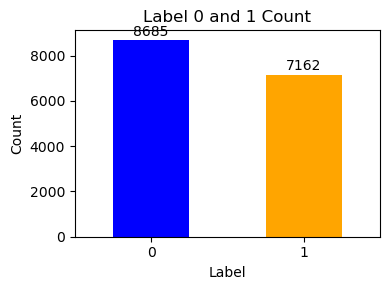

In [30]:
# Ë®àÁÆó label Ê¨Ñ‰Ωç‰∏≠ 0 Âíå 1 ÁöÑÊï∏Èáè
label_counts = data['label'].value_counts()

# Áπ™Ë£ΩÊ¢ùÂΩ¢Âúñ
plt.figure(figsize=(4, 3))
label_counts.plot(kind='bar', color=['blue', 'orange'])

# Âú®ÊØèÂÄãÊ¢ùÂΩ¢‰∏äÈ°ØÁ§∫Êï∏Â≠ó
for i, count in enumerate(label_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Label 0 and 1 Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

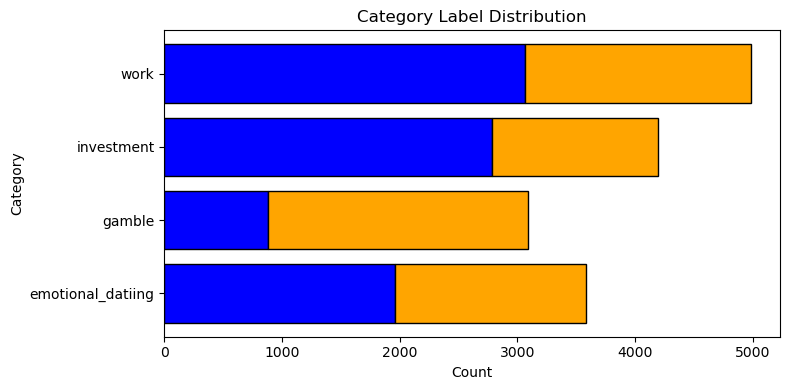

In [31]:
# ÂÅáË®≠ÈÄôÊòØÊØèÂÄã category ‰∏≠ label 0 Âíå 1 ÁöÑÊï∏Èáè
category_label_counts = data.groupby('category')['label'].value_counts().unstack(fill_value=0)

# Ë®≠ÂÆöÊ¢ùÂΩ¢ÂúñÁöÑÂ§ßÂ∞è
plt.figure(figsize=(8, 4))

# Ë®≠ÂÆöÊ¢ùÂΩ¢ÁöÑ‰ΩçÁΩÆ
categories = category_label_counts.index

# Áπ™Ë£ΩÊØèÂÄã category ÁöÑÊ¢ùÂΩ¢
for i, category in enumerate(categories):
    # label 1 ÁöÑÈ´òÂ∫¶
    label_1_count = category_label_counts.loc[category, 1]
    # label 0 ÁöÑÈ´òÂ∫¶
    label_0_count = category_label_counts.loc[category, 0]
    
    # Áπ™Ë£Ω label 0 ÁöÑÊ¢ùÂΩ¢ (‰∏ãÂçäÈÉ®)
    plt.barh(i, label_0_count, color='blue', edgecolor='black')
    # Áπ™Ë£Ω label 1 ÁöÑÊ¢ùÂΩ¢ (‰∏äÂçäÈÉ®)
    plt.barh(i, label_1_count, color='orange', left=label_0_count, edgecolor='black')

# Ë®≠ÂÆöÊ®ôÈ°åÂíåËª∏Ê®ôÁ±§
plt.title('Category Label Distribution')
plt.xlabel('Count')
plt.ylabel('Category')

# È°ØÁ§∫È°ûÂà•ÂêçÁ®± (xËª∏Ê®ôÁ±§)
plt.yticks(range(len(categories)), categories)

# È°ØÁ§∫ÂúñË°®
plt.tight_layout()
plt.show()

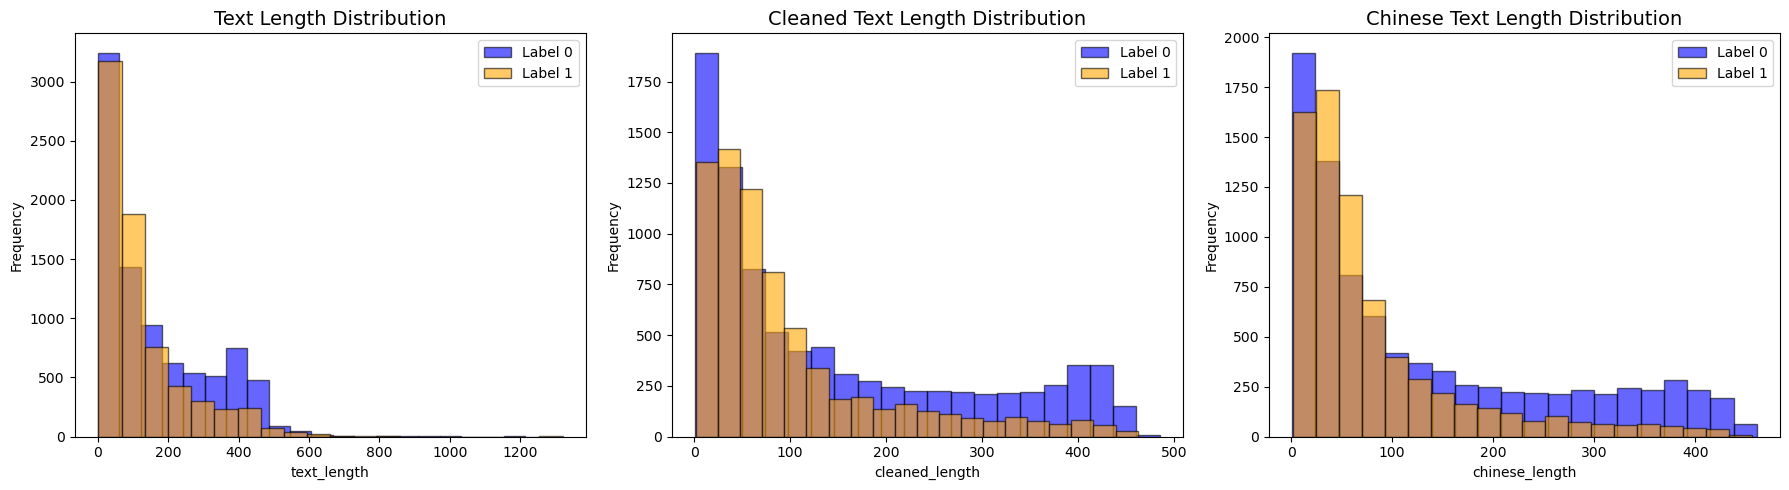

In [32]:
# ÂàÜÁÇ∫ label 0 Âíå label 1
data_label_0 = data[data["label"] == 0]
data_label_1 = data[data["label"] == 1]

# Ë®≠ÂÆöË¶ÅÁπ™Ë£ΩÁöÑËÆäÊï∏ËàáÊ®ôÈ°å
features = ["text_length", "cleaned_length", "chinese_length"]
titles = ["Text Length Distribution", "Cleaned Text Length Distribution", "Chinese Text Length Distribution"]

# Âª∫Á´ã 1x3 Â≠êÂúñ
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # ‰∏ÄË°å‰∏âÂàóÁöÑ‰ΩàÂ±Ä

# Áπ™Ë£ΩÊØèÂÄãÁâπÂæµÁöÑÁõ¥ÊñπÂúñ
for i, feature in enumerate(features):
    ax = axes[i]

    # Áπ™Ë£Ω label 0 ÁöÑÊ¢ùÂΩ¢Âúñ (ËóçËâ≤)
    n0, bins0, patches0 = ax.hist(data_label_0[feature], bins=20, color="blue", edgecolor="black", alpha=0.6, label="Label 0")

    # Áπ™Ë£Ω label 1 ÁöÑÊ¢ùÂΩ¢Âúñ (Ê©òËâ≤)
    n1, bins1, patches1 = ax.hist(data_label_1[feature], bins=20, color="orange", edgecolor="black", alpha=0.6, label="Label 1")

    # Ë®≠ÂÆöÊ®ôÈ°åÂíåËª∏Ê®ôÁ±§
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.legend()

# Ë™øÊï¥‰ΩàÂ±ÄÔºåÁ¢∫‰øùÂúñË°®‰∏çÈáçÁñä
plt.tight_layout()
plt.show()


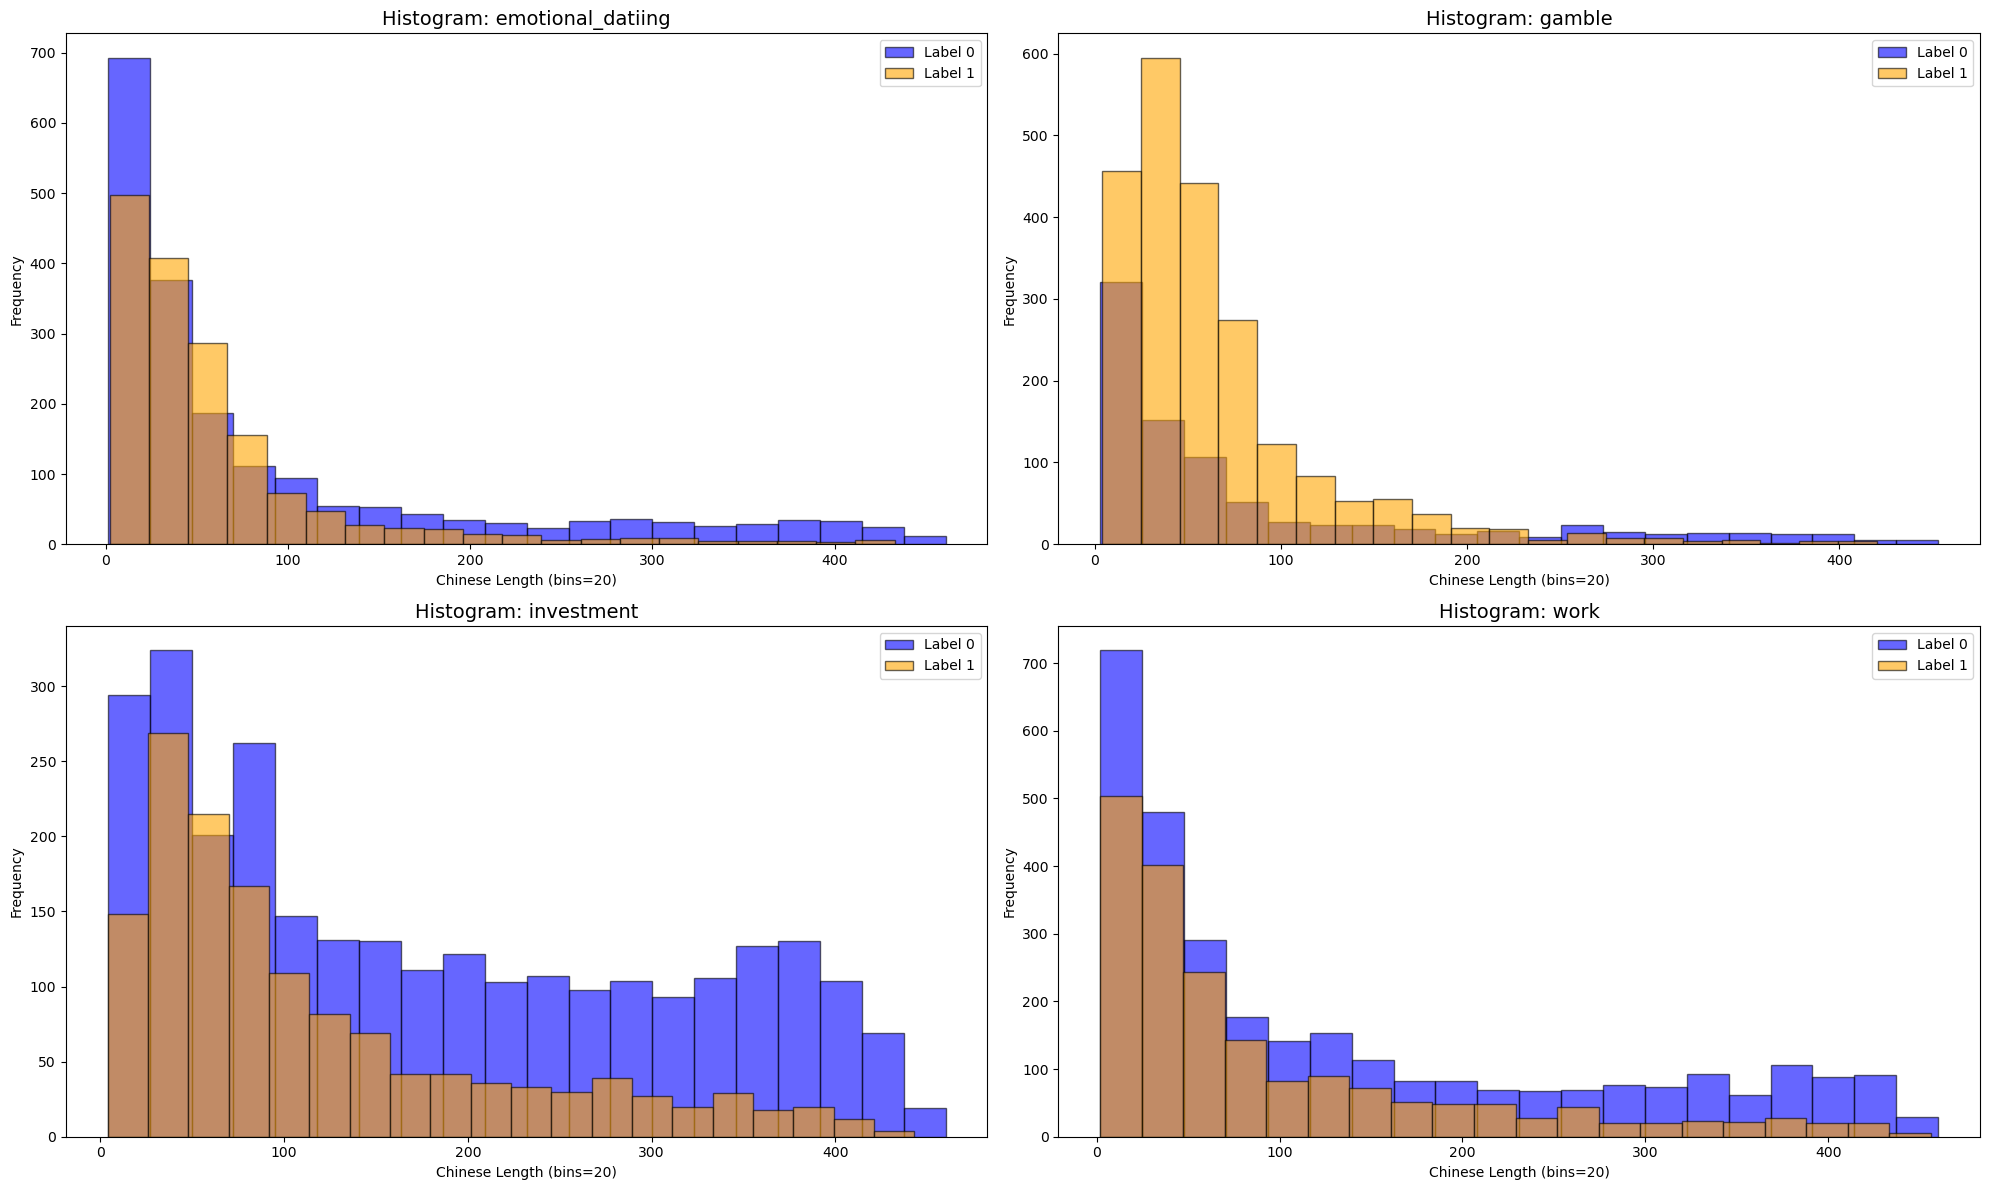

In [33]:
# Ë®≠ÂÆöÈ°èËâ≤Â∞çÊáâÔºàlabel 0 ËóçËâ≤Ôºålabel 1 Ê©òËâ≤Ôºâ
label_palette = {0: "blue", 1: "orange"}

# Ë®≠ÂÆöÂõõÂÄãÈ°ûÂà•
categories = ['emotional_datiing', 'gamble', 'investment', 'work']

# ÂàÜÈõ¢ label 0 Âíå label 1
data_label_0 = data[data["label"] == 0]
data_label_1 = data[data["label"] == 1]

# Âª∫Á´ã 2x2 Â≠êÂúñ
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # 2x2 ÊéíÂàó
axes = axes.flatten()  # Â±ïÂπ≥Êàê 1D Èô£ÂàóÔºåÊñπ‰æøËø≠‰ª£

# ‰æùÂ∫èÁπ™Ë£ΩÊØèÂÄã category
for i, category in enumerate(categories):
    ax = axes[i]  # ÈÅ∏ÊìáÂ∞çÊáâÁöÑ subplot
    
    # ÈÅéÊøæÂá∫Ë©≤ category ÁöÑË≥áÊñô
    category_data_label_0 = data_label_0[data_label_0["category"] == category]
    category_data_label_1 = data_label_1[data_label_1["category"] == category]
    
    # Áπ™Ë£Ω label 0 ÁöÑÊ¢ùÂΩ¢Âúñ (ËóçËâ≤)
    ax.hist(category_data_label_0["chinese_length"], bins=20, color="blue", edgecolor="black", alpha=0.6, label="Label 0")
    
    # Áπ™Ë£Ω label 1 ÁöÑÊ¢ùÂΩ¢Âúñ (Ê©òËâ≤)
    ax.hist(category_data_label_1["chinese_length"], bins=20, color="orange", edgecolor="black", alpha=0.6, label="Label 1")
    
    # Ë®≠ÂÆöÊ®ôÈ°åËàáËª∏Ê®ôÁ±§
    ax.set_title(f"Histogram: {category}", fontsize=14)
    ax.set_xlabel("Chinese Length (bins=20)")
    ax.set_ylabel("Frequency")
    
    # Ëá™ÂãïÈ°ØÁ§∫Âúñ‰æã
    ax.legend()

# Ë™øÊï¥Â≠êÂúñÈñìË∑ù
plt.tight_layout()
plt.show()

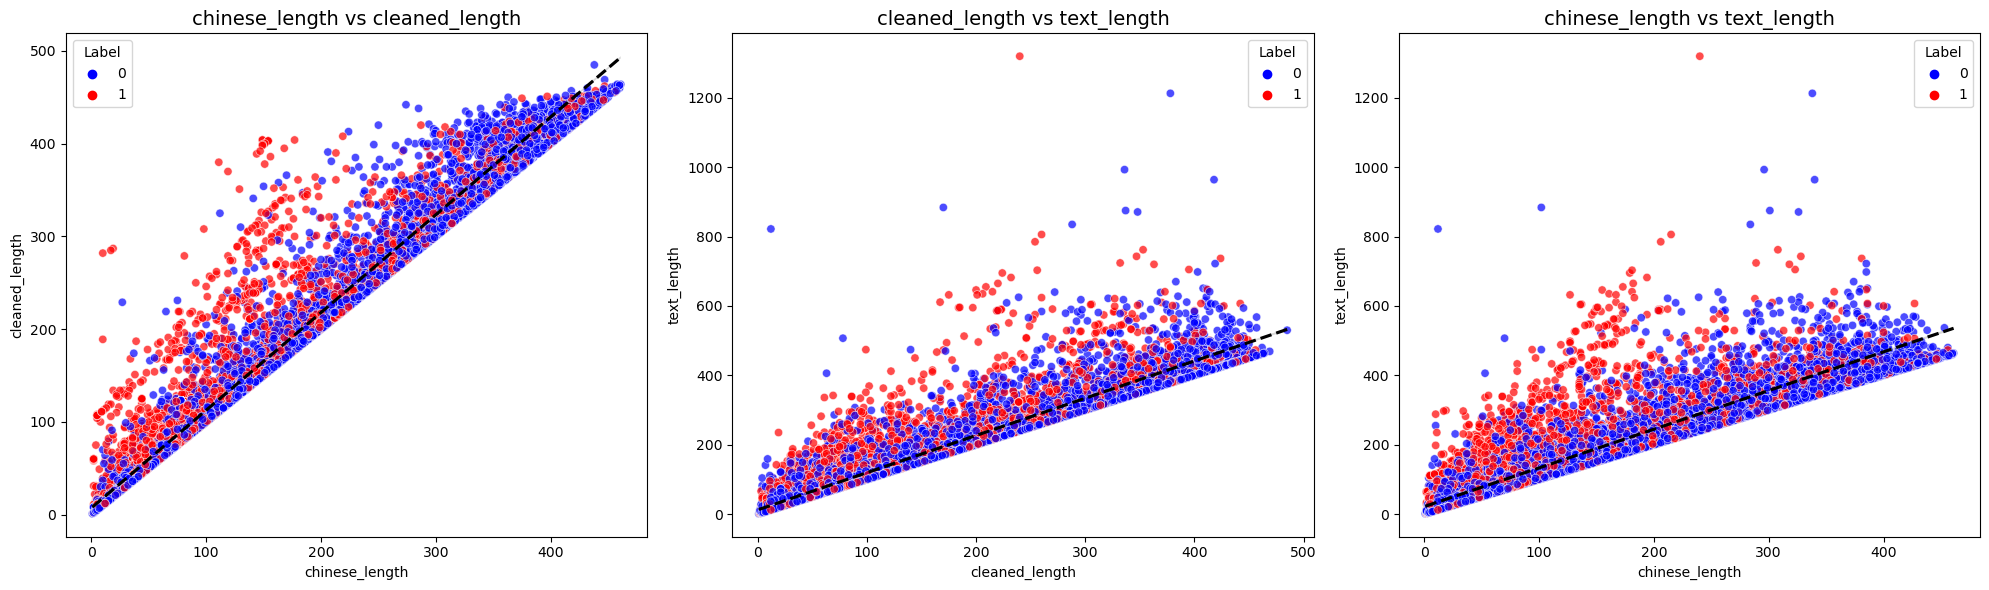

In [34]:
# Ë®≠ÂÆöËÆäÊï∏ÁµÑÂêàÔºàÂÖ©ÂÖ©ÊØîÂ∞çÔºâ
feature_pairs = [
    ("chinese_length", "cleaned_length"),
    ("cleaned_length", "text_length"),
    ("chinese_length", "text_length")
]

# Âª∫Á´ã 1x3 Â≠êÂúñ
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# È°èËâ≤Ë®≠ÂÆöÔºàlabel=0: ËóçËâ≤, label=1: Á¥ÖËâ≤Ôºâ
label_palette = {0: "blue", 1: "red"}

# ‰æùÂ∫èÁπ™Ë£ΩÊï£ÈªûÂúñ
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes[i]
    sns.scatterplot(
        data=data, x=x_feature, y=y_feature, hue="label",
        palette=label_palette, alpha=0.7, ax=ax
    )
    sns.regplot(
        data=data, x=x_feature, y=y_feature, scatter=False, ax=ax,
        color="black", line_kws={"linestyle": "dashed"}
    )

    # Ë®≠ÂÆöÊ®ôÈ°åËàáËª∏Ê®ôÁ±§
    ax.set_title(f"{x_feature} vs {y_feature}", fontsize=14)
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend(title="Label")

# Ë™øÊï¥‰ΩàÂ±Ä
plt.tight_layout()
plt.show()

In [35]:
data[data['chinese_length'] < 10]['chinese_text']

0             ÊµÅÈáèÂØÜÁ¢º
5         ËøΩÊòüÂ•≥ÁöÑÊë©ÊñØÂØÜÁ¢º
10           ÂØÜÁ¢ºÊòØÊó•Êúü
14          ÂØÜÁ¢ºÊ¥©ÊºèÂç±Ê©ü
21         Áî≥Ë´ãÂØÜÁ¢ºÊòØÂêçÁ®±
           ...    
15805      Âä™ÂäõË≥∫Èå¢Áî®ÂäõÁé©
15807    Âõ†ÁÇ∫Â¶≥‰∏ÄÁõ¥Âú®Áî®ÊâãÊ©ü
15827        Êàë‰πüÊÉ≥Ë≥∫Èå¢
15838     Ëá™Â∑±ÊâãÊ©üËºÉÂ•ΩÁúãÈΩÅ
15842      Â•ΩÂ•ΩÂ∑•‰ΩúË≥∫Èå¢Âêß
Name: chinese_text, Length: 895, dtype: object

In [36]:
# short_text_10_data = data[data['chinese_length'] < 10][['label', 'explination', 'text']]

# # ÊåáÂÆöËº∏Âá∫Ê™îÊ°àÂêçÁ®±
# output_path = "short_chinese_text_10.csv"

# # ÂÑ≤Â≠òÁÇ∫ CSV
# short_text_10_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

In [37]:
# short_text_10_data = data[data['text_length'] < 10][['label', 'explination', 'text']]

# # ÊåáÂÆöËº∏Âá∫Ê™îÊ°àÂêçÁ®±
# output_path = "short_text_10.csv"

# # ÂÑ≤Â≠òÁÇ∫ CSV
# short_text_10_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

In [38]:
data[data['text_length'] > 500]['chinese_text']

158      ÂâçÂÖ©Â§©‰∏≠‰∫ÜÊµÅÈáèÂØÜÁ¢ºË¢´ÊüêÂè∞ÁÅ£‰∫∫ÁΩµÊ≠ª‰∫ÜÊàëÁúü‰øÇÂ•ΩÊÉ≥Â±åÊüíÁè≠‰∫∫‰∏çÈÅéË´óË´ó‰∏ã‰∏ñ‰∏äÁ∏ΩÊúâÂ§öË¨ùÁöÑÂá∫ÁèæÂèØ‰ª•ÊØî‰∫∫Áî®Êñá...
236      ÊàëËÉΩÊúâÊ©üÊúÉÊâæÂà∞Âπ∏Á¶èÂóéÂéüÊú¨Êúà‰∏≠Ë¶ÅÂõûË°ó‰∏äÁöÑÁÑ°Â∞æÁÜäÂõ†ÁÇ∫ÂØíÊµÅÂª∂ÂæåÂéüÊîæÂ∏åÊúõÂÉÖÂâ©ÊôÇÈñìËÉΩÊúâË™çÈ§ä‰∫∫Âá∫ÁèæÂú∞ÈªûÂú®...
980                                           ÈªûÊÑõÂøÉÊúÉËÆäËâ≤ÂæàÁéÑÊµÅÈáèÂØÜÁ¢º
1019     ÂÜçË¶ã‰∏çÂÜçË¶ãÊÑèÂ§ñÁØáÊ≤ñÂ•ΩÊ∂ºÊ¥óÂ•ΩÂï≤ÈÇäÁàêÊñôÈªûÈêòÁµÇÊñºÂèØ‰ª•‰∏ÄÈΩäÂùê‰Ωé‰∏ÄË∑ØÁÖ≤Âäá‰∏ÄË∑ØÁÉöÂêìÁÉöÂêìÂÖ∂ÂØ¶ÊàëÈÉΩÂ•ΩÊúüÂæÖÂêåÂòÖ...
1160     ‰∏ãÁè≠ÊôÇÈñìÂπ´Âêå‰∫ãÂõûÁ≠îÈòøÂ¨§ÁöÑÂÅúËªäË≤ªÂïèÈ°åÂ§ßÂ§úÂπ´ÂÆ¢‰∫∫Êìç‰ΩúÊåâÂÅúËªäË≤ªÂçªÁôºÁèæ‰ªñÁöÑÊòØÁßÅ‰∫∫ÂÅúËªäÂ†¥ÁöÑÁπ≥Ë≤ªÂñÆÊ≤íËæ¶Ê≥ï...
                               ...                        
15510    ‰ªäÂ§©Ë∑üÂâçÂêå‰∫ãÊö¢ËÅäÂæàÊÑâÂø´ÊÑõË≥∫Èå¢ÂñúÊ≠°Èù†Ëá™Â∑±ÁöÑÂ•≥ÁîüËÅäÂú®‰∏ÄËµ∑Â∞±ÊòØÈñãÂøÉÊúüÈñìÂ∏∂Âà∞ÊàëÂâçÁî∑ÂèãÂâçÁî∑ÂèãÂ™ΩÂ™ΩË∂ÖÁ¥öÂñú...
15601    Â≠§ÂÖíÂ∞èÂ≠©ÊãøËëóÊòéÂπ¥ÂØíÂÅáÁöÑÂÜ¨‰ª§ÁáüÁöÑÂ†±ÂêçË°®ÂÖ∂ÂØ¶ÊòØÂÆâË¶™Áè≠ÂèñÂ•ΩËÅΩ‰∏ÄÈªûÁöÑÂêçÁ

In [39]:
data[data['text_length'] > 500]['chinese_text'].iloc[0]

'ÂâçÂÖ©Â§©‰∏≠‰∫ÜÊµÅÈáèÂØÜÁ¢ºË¢´ÊüêÂè∞ÁÅ£‰∫∫ÁΩµÊ≠ª‰∫ÜÊàëÁúü‰øÇÂ•ΩÊÉ≥Â±åÊüíÁè≠‰∫∫‰∏çÈÅéË´óË´ó‰∏ã‰∏ñ‰∏äÁ∏ΩÊúâÂ§öË¨ùÁöÑÂá∫ÁèæÂèØ‰ª•ÊØî‰∫∫Áî®ÊñáÂ≠óÁôºÊ¥©‰∏ã‰∏ÄÂçÉÂπæÁôæÁúü‰øÇÂîî‰øÇÂí©Èå¢‰ª≤Ë¶Å‰øÇÂè∞Âπ£Â±ÖÁÑ∂Ë¨õÂà∞ÊØî‰∫∫ÂëΩÈáçË¶ÅÊàë‰æùÁÑ∂Áõ∏‰ø°Ê≠ªËÄÖÈÉΩÂîîÊÉ≥ÊêûÂà∞ÂíÅÂîî‰øÇ‰∫∫‰∫∫ÈÉΩË≠òÂÅöÁîüÊÑè‰∫∫ÈÉΩÊ≠ªÂ∑¶‰ª≤Ë¶ÅÁî®ÊñáÂ≠óÈû≠Â±ç‰∏çÈÅéÂîîÁ∑äË¶ÅÈÉΩÁùáÂîîÂà∞‰øÇÂõâ‰øÇÊàëÈåØ‰∏ÄÂñÆÂ∑•‰ΩúÂÅöÂÖ©Â∞èÊôÇÂ∞±ÊêµÂà∞ÈÅéËê¨Âè∞Âπ£ÊâÄ‰ª•ÂîîÁü•Ê∞ëÈñìËã¶Ê≥ÅË≤∑ÂæóËõãÁ≥ïÈÉΩÂîî‰øÇÁ™ÆÂà∞ÁÑ°È£ØÈ£üÂòÖ‰∫∫Âï¶ÂîîÈÄöÂëÉÂÆåÈå¢Â∏∂ÂüãËêΩÊ£∫ÊùêÊúÉÁî®Âà∞Âí©Ë¶ÅÈ¨ß‰∫∫Êõ¥Èõ£ËÅΩÊõ¥‰ªÜË°óÊàëÂº∑È†ÖÂ±å‰∫∫Â±åÂ∑¶ÂπæÂçÅÂπ¥Á∂ìÈ©óË±êÂØåË∫´Á∂ìÁôæÊà∞ÂèçÊ≠£ÊàëÊ≠ªÂæåËêΩÁ°¨Âú∞ÁçÑÂéüÊú¨Áúü‰øÇÊÉ≥ÂÖ®ÂäõÈñãÁÅ´‰∏çÈÅéÂë¢ÂÖ©Êó•ÊÉ≥Ë≤∑Ê≥∞Â¶πÁâàÊôÇÈñìÈÉΩËä±Âú®Á∂≤Ë≥º‰∏äÂçÅËê¨‰∫∫ÁùáÈÅéÈÉΩ‰øÇ‰∏ÄÂ∞èÈÉ®‰ªΩ‰∫∫ÁΩµÊàëÂï´ÂîîÁóïÂîîÁóõÊû∂'

In [40]:
# # ÈÅéÊøæÂá∫ text_length > 500 ÁöÑË≥áÊñô
# filtered_data = data[data['text_length'] > 500][['label', 'explination', 'text']]

# # ÊåáÂÆöËº∏Âá∫Ê™îÊ°àÂêçÁ®±
# output_path = "long_text_over_500.csv"

# # ÂÑ≤Â≠òÁÇ∫ CSV
# filtered_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

In [41]:
# explination_data = data[['explination']].dropna()

# # ÊåáÂÆöËº∏Âá∫Ê™îÊ°àÂêçÁ®±
# output_path = "explination.csv"

# # ÂÑ≤Â≠òÁÇ∫ CSV
# explination_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\clair\AppData\Local\Temp\jieba.cache
Loading model cost 1.809 seconds.
Prefix dict has been built successfully.


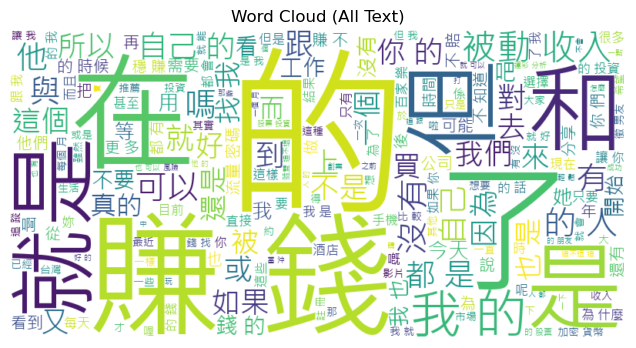

In [42]:
# Âêà‰ΩµÊâÄÊúâ text
all_text = " ".join(data["chinese_text"])

# ‰ΩøÁî® jieba ÈÄ≤Ë°åÊñ∑Ë©û
words_all = " ".join(jieba.cut(all_text))

# Âª∫Á´ãÊñáÂ≠óÈõ≤Áâ©‰ª∂
wordcloud_all = WordCloud(font_path="msjh.ttc", width=800, height=400, background_color="white").generate(words_all)

# Áπ™Ë£ΩÊñáÂ≠óÈõ≤
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_all, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud (All Text)")
plt.show()

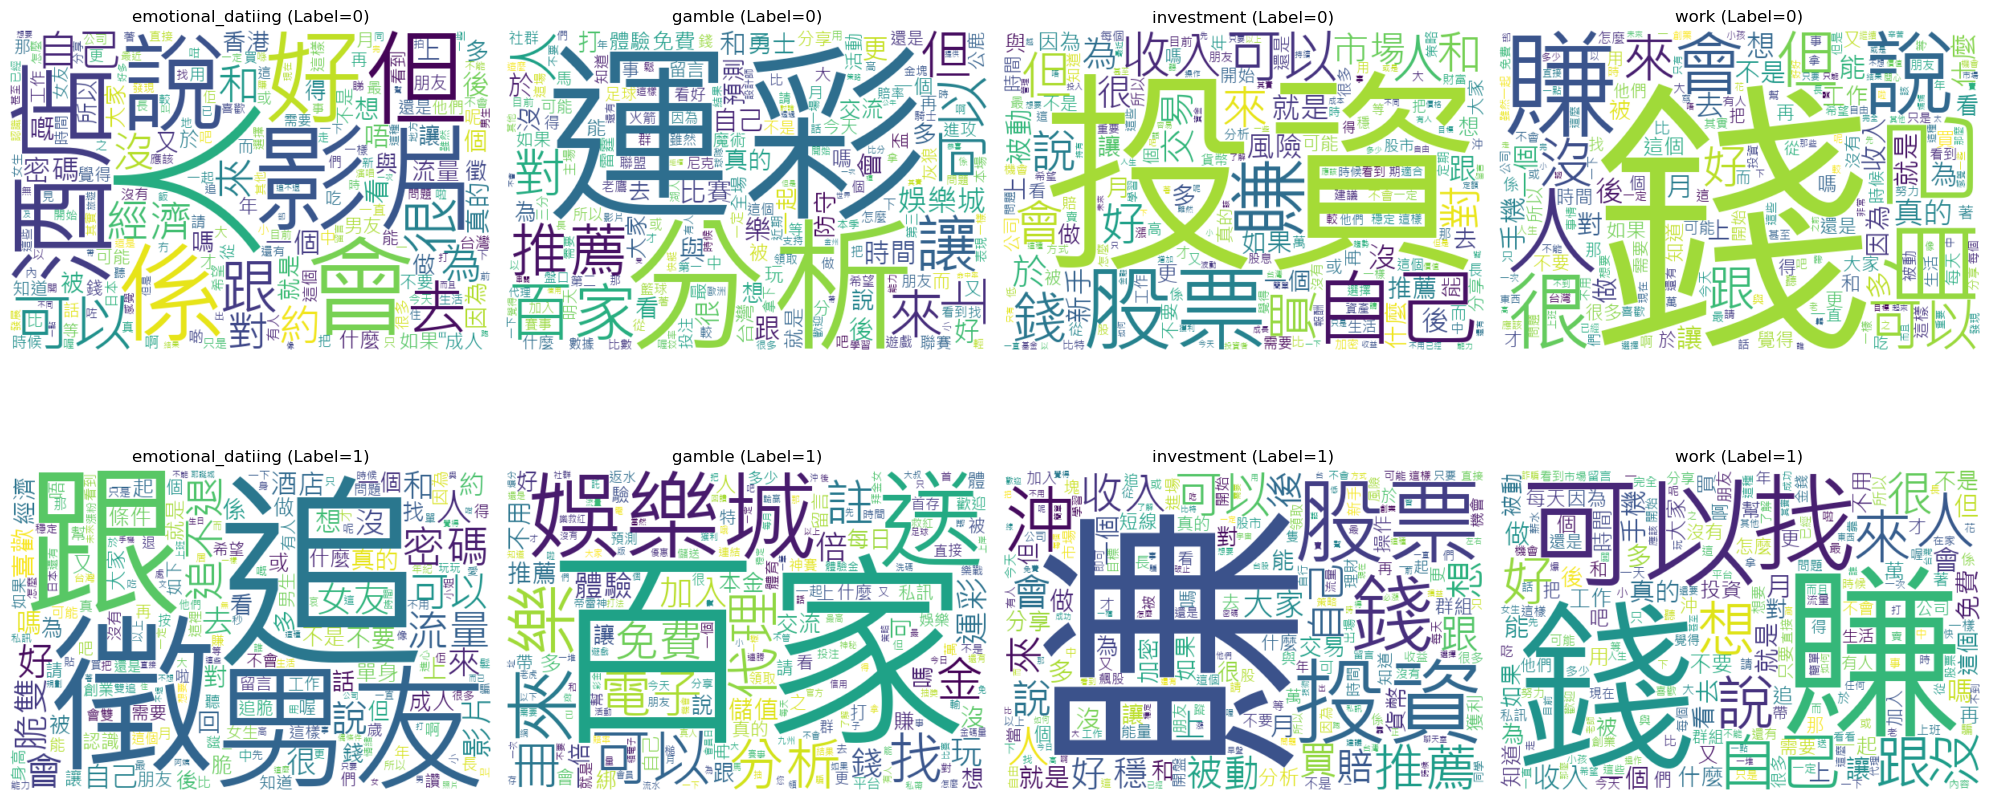

In [43]:
# Ë®≠ÂÆöÂàÜÈ°ûËàáÊ®ôÁ±§
categories = ['emotional_datiing', 'gamble', 'investment', 'work']
labels = [0, 1]
custom_stopwords = {"Êàë", "ÁöÑ", "‰∫Ü", "ÊòØ", "Âú®", "ÈÉΩ", "ÊàëÂÄë", "‰Ω†", "‰ªñ", "Â¶≥", "Â•π", "Êúâ", "Â∞±", "‰πü", "‰∏ç", "Ë¶Å", "Âà∞"}  # <- ÈÄôË£°Êîæ‰Ω†Ë¶ÅÈÅéÊøæÁöÑË©û

# Âª∫Á´ãÂúñË°®
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for row, label in enumerate(labels):
    for col, category in enumerate(categories):
        # ÂèñÂæóË©≤ÂàÜÈ°ûËàáÊ®ôÁ±§ÁöÑÊñáÊú¨
        text = " ".join(data[(data["label"] == label) & (data["category"] == category)]["chinese_text"])

        # Êñ∑Ë©û
        words = list(jieba.cut(text))

        # ÈÅéÊøæ Stop Words
        filtered_words = [word for word in words if word not in custom_stopwords]

        # Ë®àÁÆóË©ûÈ†ª
        word_count = Counter(filtered_words)

        # ÁîüÊàêÊñáÂ≠óÈõ≤
        wordcloud = WordCloud(font_path="msjh.ttc", width=600, height=400, background_color="white").generate_from_frequencies(word_count)

        # Áπ™Ë£ΩÊñáÂ≠óÈõ≤
        ax = axes[row, col]
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(f"{category} (Label={label})")

# Ë™øÊï¥‰ΩàÂ±Ä
plt.tight_layout()
plt.show()


In [44]:
# # ÈÅéÊøæÂá∫ text_length > 500 ÁöÑË≥áÊñô
# filtered_data = data[data['text'].str.count('Â®õÊ®ÇÂüé') > 0][['label', 'explination', 'text']]

# # ÊåáÂÆöËº∏Âá∫Ê™îÊ°àÂêçÁ®±
# output_path = "text_Â®õÊ®ÇÂüé.csv"

# # ÂÑ≤Â≠òÁÇ∫ CSV
# filtered_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

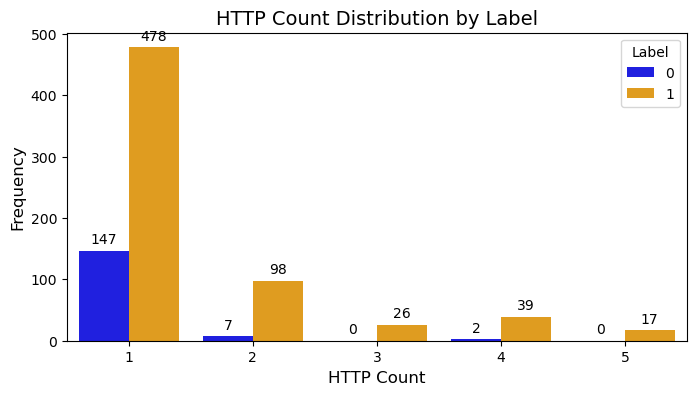

In [45]:
# Ë®≠ÂÆöÂúñË°®Â§ßÂ∞è
plt.figure(figsize=(8, 4))

# Áπ™Ë£Ω http_count ÁöÑÊï∏ÈáèÂàÜÂ∏ÉÔºà‰æù label ÂçÄÂàÜÔºâ
sns.countplot(data=data[data['http_count'] > 0], x="http_count", hue="label", palette={0: "blue", 1: "orange"})

# Ë®≠ÂÆöÊ®ôÈ°åËàáËª∏Ê®ôÁ±§
plt.title("HTTP Count Distribution by Label", fontsize=14)
plt.xlabel("HTTP Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label")

# È°ØÁ§∫Êï∏ÂÄºÊ®ôË®ò
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%d", fontsize=10, padding=3)

# È°ØÁ§∫ÂúñË°®
plt.show()

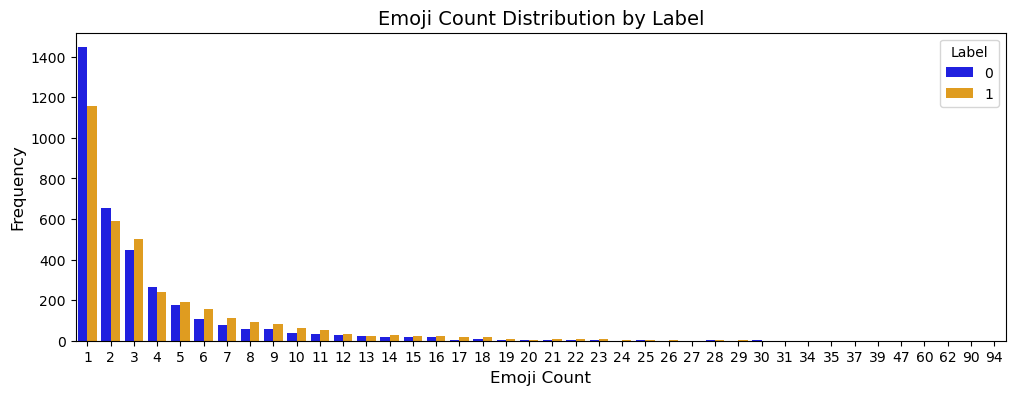

In [46]:
# Ë®≠ÂÆöÂúñË°®Â§ßÂ∞è
plt.figure(figsize=(12, 4))

# Áπ™Ë£Ω http_count ÁöÑÊï∏ÈáèÂàÜÂ∏ÉÔºà‰æù label ÂçÄÂàÜÔºâ
sns.countplot(data=data[data['emoji_count'] > 0], x="emoji_count", hue="label", palette={0: "blue", 1: "orange"})

# Ë®≠ÂÆöÊ®ôÈ°åËàáËª∏Ê®ôÁ±§
plt.title("Emoji Count Distribution by Label", fontsize=14)
plt.xlabel("Emoji Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label")

# È°ØÁ§∫ÂúñË°®
plt.show()

In [47]:
# # ÈÅéÊøæÂá∫ text_length > 500 ÁöÑË≥áÊñô
# filtered_data = data[(data['http_count'] > 0) & (data['label'] == 0)][['label', 'explination', 'text']]

# # ÊåáÂÆöËº∏Âá∫Ê™îÊ°àÂêçÁ®±
# output_path = "text_Á∂≤ÂùÄ.csv"

# # ÂÑ≤Â≠òÁÇ∫ CSV
# filtered_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

# Generate train and test data

In [48]:
# ÂÆöÁæ©ÂàÜÈ°ûÈ°ûÂà•
categories = ['emotional_datiing', 'gamble', 'investment', 'work']

# Âª∫Á´ãË≥áÊñôÂ§æÁµêÊßã
base_dir = "Datasets_new"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

summary_data = []

# ÈÄêÈ°ûÂà•ËôïÁêÜ
for category in categories:
    # ÈÅéÊøæÂá∫Ë©≤È°ûÂà•ÁöÑË≥áÊñô
    category_df = data[data['category'] == category]

    # ÈÄ≤Ë°å 8:2 ÂàÜÂâ≤
    train_df, test_df = train_test_split(category_df, test_size=0.2, random_state=42)

    # Âè™‰øùÁïô label Âíå text Ê¨Ñ‰Ωç
    train_df = train_df[['text', 'label']]
    test_df = test_df[['text', 'label']]

    # ËΩâÊàê JSON
    train_json = train_df.to_json(orient='records', force_ascii=False, indent=4)
    test_json = test_df.to_json(orient='records', force_ascii=False, indent=4)

    # Ë®≠ÂÆöËº∏Âá∫Ë∑ØÂæë
    train_filepath = os.path.join(train_dir, f"train_{category}.json")
    test_filepath = os.path.join(test_dir, f"test_{category}.json")

    # ÂÑ≤Â≠ò JSON Ê™îÊ°à
    with open(train_filepath, 'w', encoding='utf-8') as train_file:
        train_file.write(train_json)

    with open(test_filepath, 'w', encoding='utf-8') as test_file:
        test_file.write(test_json)

    print(f"{train_filepath} Âíå {test_filepath} Â∑≤ÂÑ≤Â≠òÔºÅ")

    # Ë®òÈåÑÁ≠ÜÊï∏Âà∞ summary_data
    summary_data.append({
        "category": category,
        "train": len(train_df),
        "test": len(test_df),
        "sum": len(train_df) + len(test_df)  # Ê©´ÂêëÁ∏ΩË®à
    })

Datasets_new\train\train_emotional_datiing.json Âíå Datasets_new\test\test_emotional_datiing.json Â∑≤ÂÑ≤Â≠òÔºÅ
Datasets_new\train\train_gamble.json Âíå Datasets_new\test\test_gamble.json Â∑≤ÂÑ≤Â≠òÔºÅ
Datasets_new\train\train_investment.json Âíå Datasets_new\test\test_investment.json Â∑≤ÂÑ≤Â≠òÔºÅ
Datasets_new\train\train_work.json Âíå Datasets_new\test\test_work.json Â∑≤ÂÑ≤Â≠òÔºÅ


In [49]:
summary_df = pd.DataFrame(summary_data)

# Ë®àÁÆóÁõ¥ÂêëÁ∏ΩË®à (Á∏Ω Train & Test Á≠ÜÊï∏)
summary_sum = {
    "category": "sum",
    "train": summary_df["train"].sum(),
    "test": summary_df["test"].sum(),
    "sum": summary_df["sum"].sum()
}

# Âä†ÂÖ•Á∏ΩË®àË°å
summary_df = pd.concat([summary_df, pd.DataFrame([summary_sum])], ignore_index=True)
print(summary_df.to_string(index=False))

         category  train  test   sum
emotional_datiing   2866   717  3583
           gamble   2471   618  3089
       investment   3354   839  4193
             work   3985   997  4982
              sum  12676  3171 15847
